In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings

In [119]:
df= pd.read_csv(r"C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\2017\superstore.csv") 


In [120]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [121]:
df.drop(['Order Date','Row ID', 'Order ID','Ship Date','Ship Mode','Customer ID','Customer Name','Country','City','State','Postal Code','Region','Product ID','Product Name'], axis=1, inplace=True)
df.columns

Index(['Segment', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [122]:
df.to_csv(r'C:\Users\Admin\Desktop\HK1_2023\BI\Final 1\Models_decide1.csv', index=False)

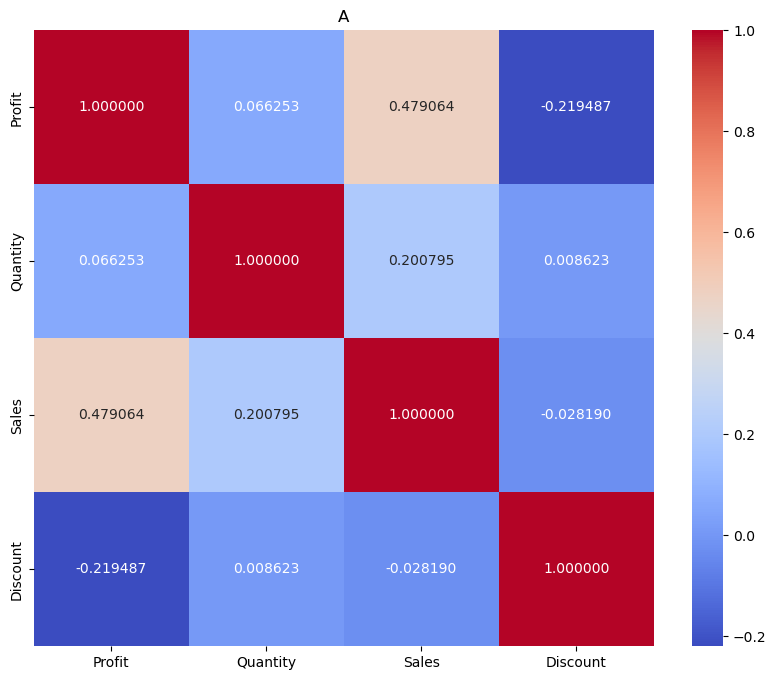

,Profit,Quantity,Sales,Discount
Profit,1.000000,0.066253,0.479064,-0.219487
Quantity,0.066253,1.000000,0.200795,0.008623
Sales,0.479064,0.200795,1.000000,-0.028190
Discount,-0.219487,0.008623,-0.028190,1.000000


In [123]:
# Calculating correlations for quantitative variables
quantitative_correlations = df[['Profit', 'Quantity', 'Sales', 'Discount']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(quantitative_correlations, annot=True, cmap='coolwarm', fmt=".6f")
plt.title('A')
plt.show()
quantitative_correlations

In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if(df.dtypes[i] == 'object'):
        df[i] = le.fit_transform(df[i])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9994 non-null   int32  
 1   Category      9994 non-null   int32  
 2   Sub-Category  9994 non-null   int32  
 3   Sales         9994 non-null   float64
 4   Quantity      9994 non-null   int64  
 5   Discount      9994 non-null   float64
 6   Profit        9994 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 429.6 KB


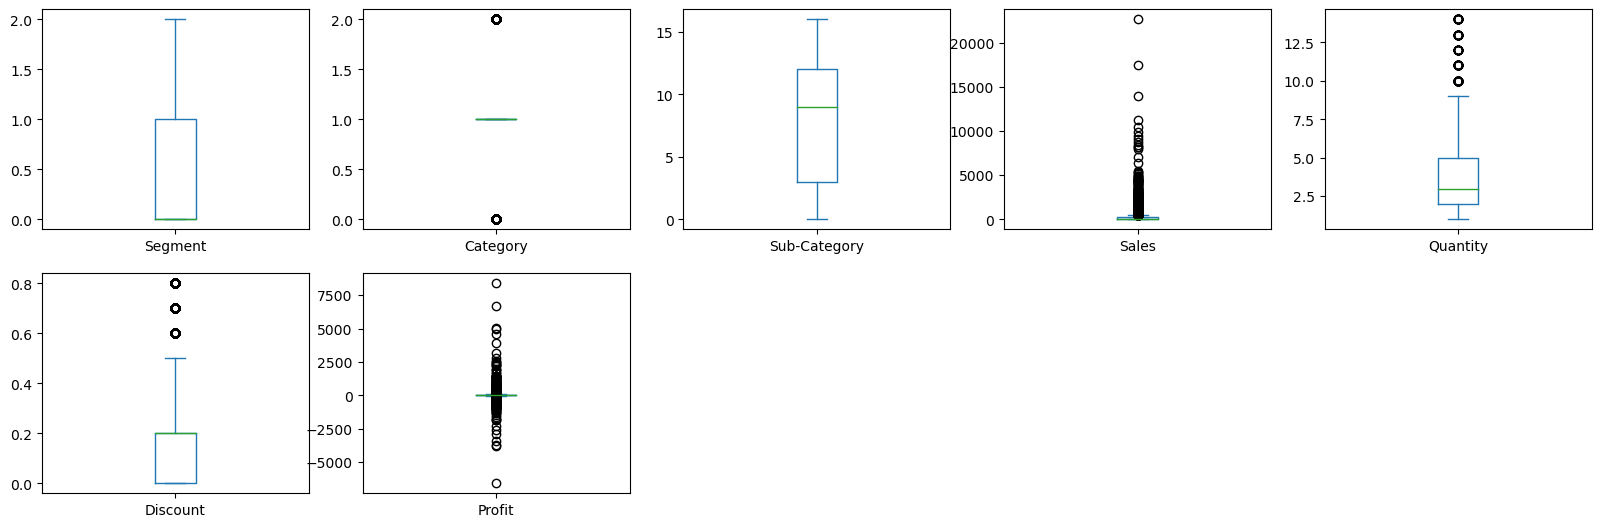

In [125]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()

In [126]:
#deleting some of outliers while keeping the consistency of our data
print("Old Shape: ", df.shape[0])
df.drop(index= df[(df['Sales'] > 3000)].index, inplace=True)
df.drop(index= df[(df['Profit'] > 1000)].index, inplace=True)
df.drop(index= df[(df['Quantity'] > 9)].index, inplace=True)
print("NEW Shape: ", df.shape[0])

Old Shape:  9994
NEW Shape:  9758


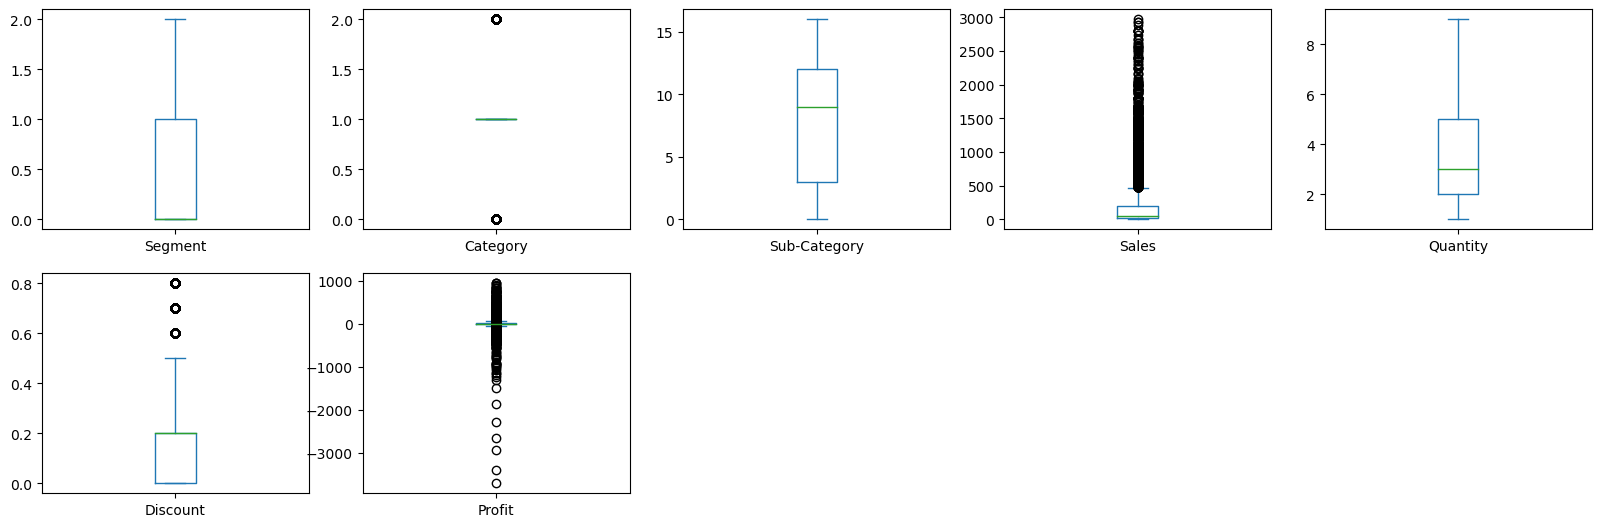

In [127]:
df.plot(kind='box', subplots=True, figsize=(20,20), layout=(6,5))
plt.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9758 entries, 0 to 9993
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       9758 non-null   int32  
 1   Category      9758 non-null   int32  
 2   Sub-Category  9758 non-null   int32  
 3   Sales         9758 non-null   float64
 4   Quantity      9758 non-null   int64  
 5   Discount      9758 non-null   float64
 6   Profit        9758 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 495.5 KB


In [129]:
random_sample = df.sample(n=9000)
ramdom_test = df.sample(n =2)

In [137]:
ramdom_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 52 to 5481
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Segment       2 non-null      int32  
 1   Category      2 non-null      int32  
 2   Sub-Category  2 non-null      int32  
 3   Sales         2 non-null      float64
 4   Quantity      2 non-null      int64  
 5   Discount      2 non-null      float64
 6   Profit        2 non-null      float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 104.0 bytes


In [130]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score #cross validation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from mlxtend.plotting import plot_confusion_matrix

#using standard scaler 
sc = StandardScaler()
x = random_sample.drop(['Sales'] , axis = 1).values
y =random_sample['Sales'].values

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

linear regression
0.14208965482317515
0.16647200160144904
Reg_score: 0.16647200160144904
Mean Squared Error: 100377.8539817554
Mean absolute percentage error: 6.300955754169258
Mean absolute error: 190.50083958675833
rmse: 316.8246423208829


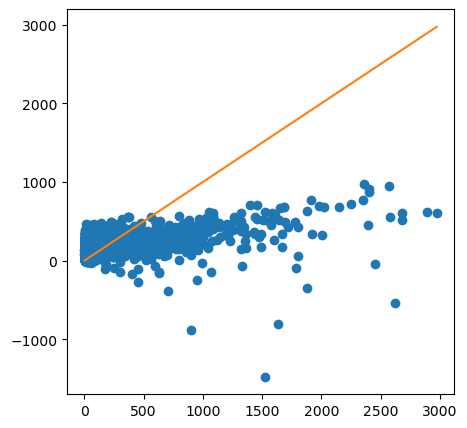


[117.35502813 136.7363453  283.23815089 ... 159.91587169 363.75830151
  13.47681394]


In [131]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #Pipeline([('std_scaler', StandardScaler()),('linear_regressor',LinearRegression(normalize=True,fit_intercept=False))])
lr.fit(x_train, y_train)
print("linear regression")
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o') 
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()
print(y_pred)

Learning rate set to 0.054762
0:	learn: 330.4498096	total: 1.34ms	remaining: 1.34s
1:	learn: 320.3472463	total: 2.52ms	remaining: 1.26s
2:	learn: 310.7699630	total: 3.81ms	remaining: 1.26s
3:	learn: 302.2554810	total: 5ms	remaining: 1.25s
4:	learn: 293.7947949	total: 6.16ms	remaining: 1.23s
5:	learn: 286.4103518	total: 7.27ms	remaining: 1.2s
6:	learn: 278.5657776	total: 8.42ms	remaining: 1.19s
7:	learn: 271.2730133	total: 9.56ms	remaining: 1.19s
8:	learn: 264.2302490	total: 10.7ms	remaining: 1.18s
9:	learn: 257.5451530	total: 11.8ms	remaining: 1.17s
10:	learn: 251.2451712	total: 12.9ms	remaining: 1.16s
11:	learn: 246.3607387	total: 14.1ms	remaining: 1.16s
12:	learn: 240.7899997	total: 15.2ms	remaining: 1.16s
13:	learn: 235.9731336	total: 16.3ms	remaining: 1.15s
14:	learn: 231.2865047	total: 17.4ms	remaining: 1.15s
15:	learn: 227.0942822	total: 18.7ms	remaining: 1.15s
16:	learn: 222.8462778	total: 19.9ms	remaining: 1.15s
17:	learn: 218.6094791	total: 21ms	remaining: 1.15s
18:	learn: 214

172:	learn: 124.9030392	total: 200ms	remaining: 956ms
173:	learn: 124.7610811	total: 201ms	remaining: 956ms
174:	learn: 124.5196291	total: 202ms	remaining: 955ms
175:	learn: 124.4249590	total: 204ms	remaining: 954ms
176:	learn: 124.3155261	total: 205ms	remaining: 953ms
177:	learn: 124.2009000	total: 206ms	remaining: 953ms
178:	learn: 123.9636436	total: 208ms	remaining: 952ms
179:	learn: 123.8218226	total: 209ms	remaining: 951ms
180:	learn: 123.5546035	total: 210ms	remaining: 951ms
181:	learn: 123.3779350	total: 212ms	remaining: 951ms
182:	learn: 123.2594411	total: 213ms	remaining: 950ms
183:	learn: 123.1659297	total: 214ms	remaining: 950ms
184:	learn: 123.0825570	total: 215ms	remaining: 949ms
185:	learn: 122.9258213	total: 217ms	remaining: 948ms
186:	learn: 122.8150035	total: 218ms	remaining: 947ms
187:	learn: 122.6848797	total: 219ms	remaining: 946ms
188:	learn: 122.5855539	total: 220ms	remaining: 944ms
189:	learn: 122.3816845	total: 221ms	remaining: 943ms
190:	learn: 122.3183197	tota

335:	learn: 109.9492948	total: 393ms	remaining: 776ms
336:	learn: 109.8719025	total: 394ms	remaining: 775ms
337:	learn: 109.7708985	total: 395ms	remaining: 774ms
338:	learn: 109.7078891	total: 397ms	remaining: 773ms
339:	learn: 109.6582893	total: 398ms	remaining: 772ms
340:	learn: 109.6103497	total: 399ms	remaining: 771ms
341:	learn: 109.5423154	total: 400ms	remaining: 770ms
342:	learn: 109.4553474	total: 402ms	remaining: 769ms
343:	learn: 109.3950118	total: 403ms	remaining: 768ms
344:	learn: 109.3681294	total: 404ms	remaining: 767ms
345:	learn: 109.2990489	total: 405ms	remaining: 766ms
346:	learn: 109.2167294	total: 407ms	remaining: 765ms
347:	learn: 109.1696911	total: 408ms	remaining: 764ms
348:	learn: 109.1241082	total: 409ms	remaining: 763ms
349:	learn: 109.0793926	total: 410ms	remaining: 762ms
350:	learn: 109.0505178	total: 412ms	remaining: 761ms
351:	learn: 108.9904373	total: 413ms	remaining: 760ms
352:	learn: 108.9337971	total: 414ms	remaining: 759ms
353:	learn: 108.8767840	tota

499:	learn: 101.2038816	total: 587ms	remaining: 587ms
500:	learn: 101.1368815	total: 588ms	remaining: 586ms
501:	learn: 101.0982421	total: 590ms	remaining: 585ms
502:	learn: 101.0622907	total: 591ms	remaining: 584ms
503:	learn: 101.0328323	total: 592ms	remaining: 583ms
504:	learn: 100.9947552	total: 594ms	remaining: 582ms
505:	learn: 100.9717360	total: 595ms	remaining: 581ms
506:	learn: 100.9131514	total: 597ms	remaining: 580ms
507:	learn: 100.8461459	total: 598ms	remaining: 579ms
508:	learn: 100.8162607	total: 600ms	remaining: 578ms
509:	learn: 100.7530646	total: 601ms	remaining: 578ms
510:	learn: 100.7400687	total: 603ms	remaining: 577ms
511:	learn: 100.6887742	total: 604ms	remaining: 576ms
512:	learn: 100.6218671	total: 605ms	remaining: 575ms
513:	learn: 100.5622829	total: 607ms	remaining: 574ms
514:	learn: 100.5291213	total: 608ms	remaining: 573ms
515:	learn: 100.4961113	total: 610ms	remaining: 572ms
516:	learn: 100.4327268	total: 611ms	remaining: 571ms
517:	learn: 100.3812886	tota

798:	learn: 91.1259788	total: 974ms	remaining: 245ms
799:	learn: 91.0856466	total: 976ms	remaining: 244ms
800:	learn: 91.0581244	total: 977ms	remaining: 243ms
801:	learn: 91.0208062	total: 978ms	remaining: 242ms
802:	learn: 90.9870788	total: 980ms	remaining: 240ms
803:	learn: 90.9606887	total: 981ms	remaining: 239ms
804:	learn: 90.9504049	total: 982ms	remaining: 238ms
805:	learn: 90.9314265	total: 984ms	remaining: 237ms
806:	learn: 90.9152492	total: 985ms	remaining: 236ms
807:	learn: 90.9024807	total: 986ms	remaining: 234ms
808:	learn: 90.8919228	total: 988ms	remaining: 233ms
809:	learn: 90.8682514	total: 989ms	remaining: 232ms
810:	learn: 90.8514484	total: 990ms	remaining: 231ms
811:	learn: 90.8281449	total: 992ms	remaining: 230ms
812:	learn: 90.8120356	total: 993ms	remaining: 228ms
813:	learn: 90.7970536	total: 994ms	remaining: 227ms
814:	learn: 90.7554713	total: 995ms	remaining: 226ms
815:	learn: 90.7304070	total: 996ms	remaining: 225ms
816:	learn: 90.6743320	total: 998ms	remaining:

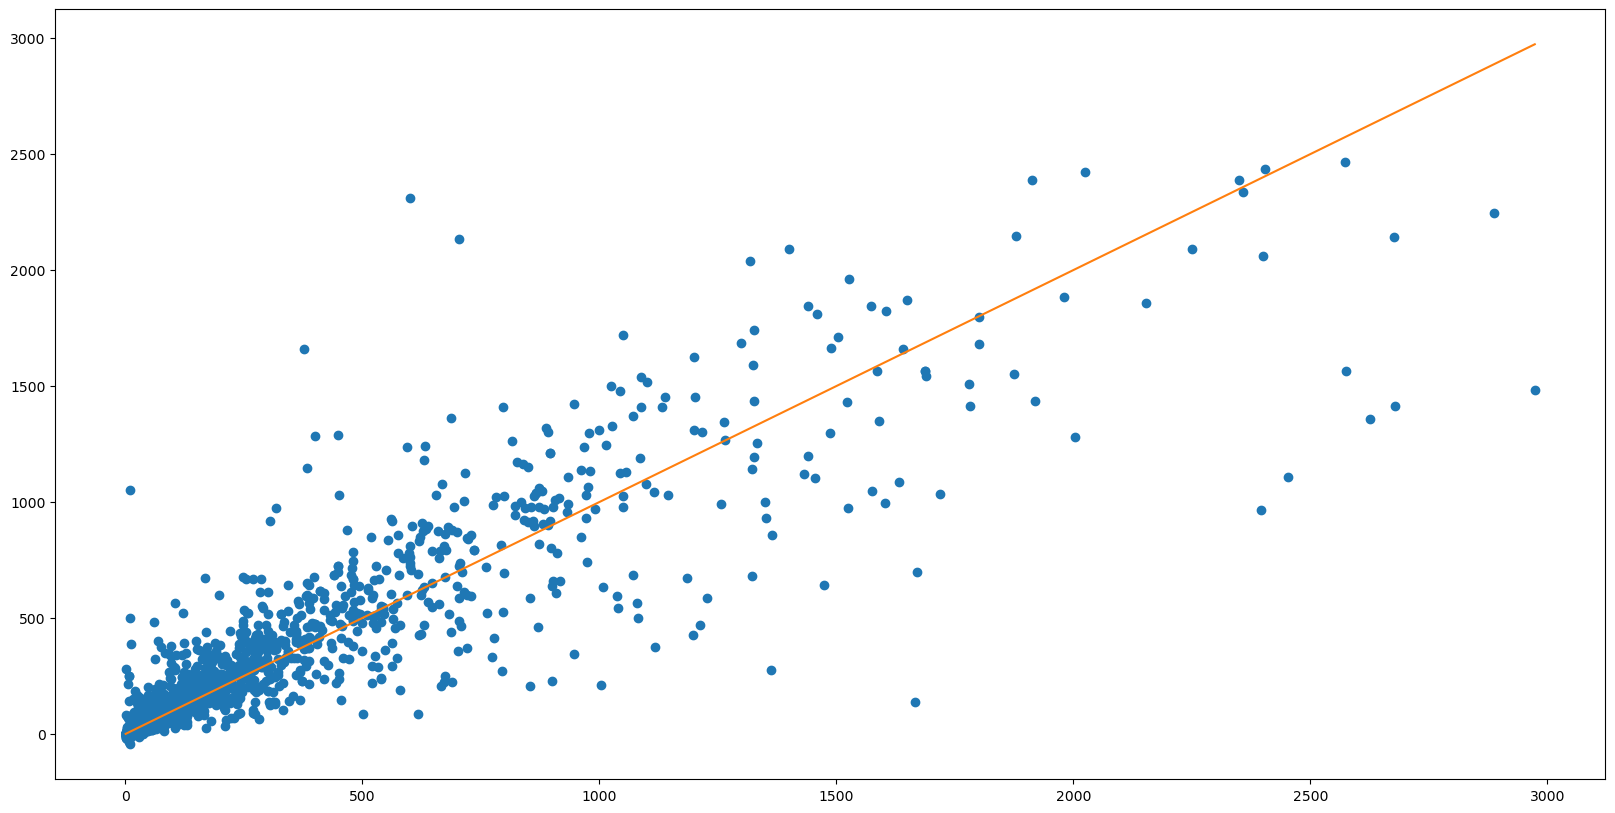


[197.0939711   50.9267266  109.11980789 ... 101.01605804  10.58223523
 101.51932369]


In [132]:
from catboost import CatBoostRegressor
cat= CatBoostRegressor() #Pipeline([('std_scaler', StandardScaler()),('catboost_regressor',CatBoostRegressor(iterations=20))])
cat.fit(x_train, y_train)
print('CAT')
print(cat.score(x_train,y_train))
print(cat.score(x_test, y_test))
y_pred = cat.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()
print(y_pred)

RF
0.7359630717289054
0.7189589993414952
Reg_score: 0.7189589993414952
Mean Squared Error: 33844.44503506297
Mean absolute percentage error: 3.157963380454373
Mean absolute error: 102.19492888055457
rmse: 183.96859795917067


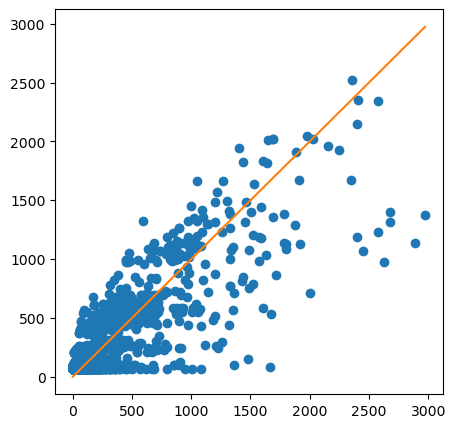

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 4 , max_features= 6)
rf.fit(x_train,y_train)
print('RF')
print(rf.score(x_train,y_train))
print(rf.score(x_test , y_test))
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()

XGB
0.8563129863308804
0.7957033583389777
Reg_score: 0.7957033583389777
Mean Squared Error: 24602.483065971064
Mean absolute percentage error: 1.6386819991204684
Mean absolute error: 75.3613445943807
rmse: 156.8517869390434


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


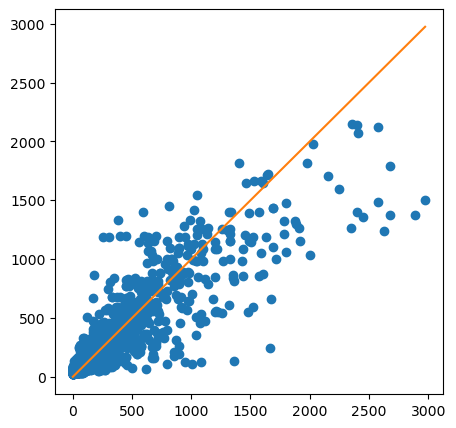

In [134]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective ='reg:linear', n_estimators = 7, seed = 123) #Pipeline([('std_scaler', StandardScaler()),('xgboost_regressor',XGBRegressor(n_estimators=50,max_depth=3))])
xgb.fit(x_train, y_train)
print('XGB')
print(xgb.score(x_train, y_train))
print(xgb.score(x_test, y_test))
y_pred = xgb.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_pred, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()
print()


In [135]:
# Huấn luyện mô hình CatBoostRegressor
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=20, verbose=False)
cat.fit(x_train, y_train)

# Lưu mô hình đã huấn luyện vào một tệp
cat.save_model('catboost_model.cbm')

# Các bước tiếp theo là đánh giá mô hình...


In [136]:
x_new = ramdom_test.drop('Sales', axis=1)  
y_new = ramdom_test['Sales']


cat = CatBoostRegressor()
cat.load_model('catboost_model.cbm')

# Bước 3: Thực hiện dự đoán trên tập dữ liệu mới
y_pred_new = cat.predict(x_new)

# Bước 4: Đánh giá mô hình
mse_new = mean_squared_error(y_new, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_new, y_pred_new)

print(f'MSE on new dataset: {mse_new}')
print(f'RMSE on new dataset: {rmse_new}')
print(f'R^2 on new dataset: {r2_new}')

MSE on new dataset: 4875371.987889629
RMSE on new dataset: 2208.0244536439423
R^2 on new dataset: -6689.2307035992235


In [138]:
from supervised.automl import AutoML
automl = AutoML()
automl.fit(x_train,y_train)
print(automl.score(x_train, y_train))
print(automl.score(x_test, y_test))
y_pred = automl.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline rmse 332.872302 trained in 0.23 seconds


C:\Users\Admin\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


2_DecisionTree rmse 226.024103 trained in 6.08 seconds


C:\Users\Admin\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
C:\Users\Admin\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


3_Linear rmse 332.240902 trained in 4.84 seconds
* Step default_algorithms will try to check up to 3 models


C:\Users\Admin\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
C:\Users\Admin\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


4_Default_Xgboost rmse 146.245033 trained in 1.77 seconds
5_Default_NeuralNetwork rmse 203.019315 trained in 0.6 seconds


C:\Users\Admin\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: The figure layout has changed to tight
C:\Users\Admin\anaconda3\Lib\site-packages\supervised\utils\shap.py:116: UserWarning: The figure layout has changed to tight


6_Default_RandomForest rmse 211.960361 trained in 1.44 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 144.704366 trained in 0.13 seconds
AutoML fit time: 19.08 seconds
AutoML best model: Ensemble
0.88858752374229
0.8123986405991983
150.3061834956627


In [143]:
from sklearn.ensemble import BaggingRegressor
reg = BaggingRegressor()
reg.fit(x_train, y_train)
print('REG')
print(reg.score(x_train,y_train))
print(reg.score(x_test , y_test))
y_pred = reg.predict(x_test)
mse = mean_squared_error(y_test , y_pred)                     #Mean squared error
rmse = np.sqrt(mse)                                           #root mean squared error
reg_score = r2_score(y_test , y_pred)                         #reg_score
mape = mean_absolute_percentage_error(y_test , y_pred)        #mean absolute percentage error
mae = mean_absolute_error(y_test , y_pred)                    #mean absolute error
print('Reg_score:', reg_score )
print('Mean Squared Error:', mse)
print('Mean absolute percentage error:', mape )
print('Mean absolute error:', mae)
print('rmse:', rmse)
print()

REG
0.9645522490579846
0.8124866006137823
Reg_score: 0.8124866006137823
Mean Squared Error: 22581.35618644513
Mean absolute percentage error: 0.48786933691324064
Mean absolute error: 63.77082052654322
rmse: 150.2709425885295



In [144]:
models = [LinearRegression(),RandomForestRegressor(), XGBRegressor(), CatBoostRegressor()]

train=[]
test=[]
MSE=[]
RMSE=[]
R_Squared=[]
MAPE=[]
MAE=[]

for i in models:
    reg = BaggingRegressor(estimator=i, n_estimators=10)
    reg.fit(x_train, y_train)
    train.append(reg.score(x_train, y_train))
    test.append(reg.score(x_test, y_test))
    y_pred = reg.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)                           #Mean squared error
    MSE.append(mse)
    RMSE.append(np.sqrt(mse))                                          #root mean squared error
    R_Squared.append(r2_score(y_test, y_pred))                         #r_squared
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))        #mean absolute percentage error
    MAE.append(mean_absolute_error(y_test, y_pred))                    #mean absolute error

conclusion = pd.DataFrame({'Model':models,
                           'train_score':train,
                           'test_score': test,
                           'MS_error':MSE,
                           'RMS_error':RMSE,
                           'R_Squared':R_Squared,
                           'MAP_error':MAPE,
                           'MA_error':MAE
                           })

Learning rate set to 0.054762
0:	learn: 337.0531382	total: 1.79ms	remaining: 1.79s
1:	learn: 326.7792056	total: 3.18ms	remaining: 1.59s
2:	learn: 317.3148869	total: 4.48ms	remaining: 1.49s
3:	learn: 308.7189206	total: 5.78ms	remaining: 1.44s
4:	learn: 300.4222713	total: 7.11ms	remaining: 1.41s
5:	learn: 292.4953770	total: 8.35ms	remaining: 1.38s
6:	learn: 284.9301103	total: 9.63ms	remaining: 1.37s
7:	learn: 277.6674777	total: 10.9ms	remaining: 1.35s
8:	learn: 270.5672163	total: 12.2ms	remaining: 1.34s
9:	learn: 264.2150681	total: 13.4ms	remaining: 1.33s
10:	learn: 258.2880139	total: 14.6ms	remaining: 1.31s
11:	learn: 253.5308251	total: 15.9ms	remaining: 1.31s
12:	learn: 248.0491122	total: 17.1ms	remaining: 1.3s
13:	learn: 242.9614768	total: 18.3ms	remaining: 1.29s
14:	learn: 238.6713653	total: 19.6ms	remaining: 1.28s
15:	learn: 234.2956309	total: 20.9ms	remaining: 1.28s
16:	learn: 230.0378348	total: 22.1ms	remaining: 1.28s
17:	learn: 226.1501300	total: 23.4ms	remaining: 1.28s
18:	learn

168:	learn: 123.4379521	total: 199ms	remaining: 981ms
169:	learn: 123.2431123	total: 201ms	remaining: 980ms
170:	learn: 123.0044726	total: 202ms	remaining: 979ms
171:	learn: 122.8300943	total: 203ms	remaining: 978ms
172:	learn: 122.5925037	total: 204ms	remaining: 977ms
173:	learn: 122.3831889	total: 206ms	remaining: 976ms
174:	learn: 121.8202656	total: 207ms	remaining: 974ms
175:	learn: 121.2794815	total: 208ms	remaining: 973ms
176:	learn: 121.1080651	total: 209ms	remaining: 972ms
177:	learn: 120.9838896	total: 210ms	remaining: 972ms
178:	learn: 120.7882829	total: 212ms	remaining: 971ms
179:	learn: 120.6425025	total: 213ms	remaining: 970ms
180:	learn: 120.4780608	total: 214ms	remaining: 970ms
181:	learn: 120.3578777	total: 216ms	remaining: 969ms
182:	learn: 120.2092656	total: 217ms	remaining: 968ms
183:	learn: 119.6969057	total: 218ms	remaining: 968ms
184:	learn: 119.5043762	total: 219ms	remaining: 967ms
185:	learn: 119.3689030	total: 221ms	remaining: 966ms
186:	learn: 119.2651449	tota

334:	learn: 100.3025463	total: 392ms	remaining: 778ms
335:	learn: 100.2669796	total: 393ms	remaining: 777ms
336:	learn: 100.2045776	total: 394ms	remaining: 776ms
337:	learn: 100.0612883	total: 395ms	remaining: 775ms
338:	learn: 100.0274030	total: 397ms	remaining: 774ms
339:	learn: 99.9398296	total: 398ms	remaining: 772ms
340:	learn: 99.8726171	total: 399ms	remaining: 771ms
341:	learn: 99.7258930	total: 400ms	remaining: 770ms
342:	learn: 99.5532056	total: 402ms	remaining: 769ms
343:	learn: 99.4936590	total: 403ms	remaining: 768ms
344:	learn: 99.3998589	total: 404ms	remaining: 767ms
345:	learn: 99.3312619	total: 405ms	remaining: 766ms
346:	learn: 99.2485237	total: 406ms	remaining: 765ms
347:	learn: 99.2174218	total: 408ms	remaining: 764ms
348:	learn: 99.1189337	total: 409ms	remaining: 763ms
349:	learn: 99.0682379	total: 410ms	remaining: 762ms
350:	learn: 98.9259795	total: 412ms	remaining: 761ms
351:	learn: 98.8455000	total: 413ms	remaining: 760ms
352:	learn: 98.7898082	total: 414ms	remai

501:	learn: 88.7123895	total: 583ms	remaining: 578ms
502:	learn: 88.6694762	total: 584ms	remaining: 577ms
503:	learn: 88.6325349	total: 586ms	remaining: 576ms
504:	learn: 88.5884316	total: 587ms	remaining: 575ms
505:	learn: 88.5716956	total: 588ms	remaining: 574ms
506:	learn: 88.4891218	total: 589ms	remaining: 573ms
507:	learn: 88.4104468	total: 591ms	remaining: 572ms
508:	learn: 88.3771584	total: 592ms	remaining: 571ms
509:	learn: 88.2916394	total: 593ms	remaining: 570ms
510:	learn: 88.2283216	total: 594ms	remaining: 569ms
511:	learn: 88.1656367	total: 595ms	remaining: 567ms
512:	learn: 88.0892234	total: 596ms	remaining: 566ms
513:	learn: 88.0476226	total: 598ms	remaining: 565ms
514:	learn: 87.9103210	total: 599ms	remaining: 564ms
515:	learn: 87.8268262	total: 600ms	remaining: 563ms
516:	learn: 87.7650400	total: 601ms	remaining: 562ms
517:	learn: 87.6996959	total: 602ms	remaining: 561ms
518:	learn: 87.5820090	total: 604ms	remaining: 559ms
519:	learn: 87.5430220	total: 605ms	remaining:

669:	learn: 79.5285176	total: 779ms	remaining: 384ms
670:	learn: 79.5022443	total: 781ms	remaining: 383ms
671:	learn: 79.4758661	total: 782ms	remaining: 382ms
672:	learn: 79.4333588	total: 783ms	remaining: 381ms
673:	learn: 79.3872006	total: 784ms	remaining: 379ms
674:	learn: 79.3406134	total: 786ms	remaining: 378ms
675:	learn: 79.3023070	total: 787ms	remaining: 377ms
676:	learn: 79.2788018	total: 788ms	remaining: 376ms
677:	learn: 79.2370776	total: 789ms	remaining: 375ms
678:	learn: 79.2065975	total: 790ms	remaining: 374ms
679:	learn: 79.1450783	total: 792ms	remaining: 372ms
680:	learn: 79.1231439	total: 793ms	remaining: 371ms
681:	learn: 79.0961706	total: 794ms	remaining: 370ms
682:	learn: 79.0521831	total: 795ms	remaining: 369ms
683:	learn: 79.0006605	total: 796ms	remaining: 368ms
684:	learn: 78.9217171	total: 797ms	remaining: 367ms
685:	learn: 78.8471882	total: 798ms	remaining: 365ms
686:	learn: 78.8037275	total: 800ms	remaining: 364ms
687:	learn: 78.6992531	total: 801ms	remaining:

837:	learn: 72.3361877	total: 973ms	remaining: 188ms
838:	learn: 72.3157815	total: 975ms	remaining: 187ms
839:	learn: 72.2902970	total: 976ms	remaining: 186ms
840:	learn: 72.2618768	total: 978ms	remaining: 185ms
841:	learn: 72.2185911	total: 979ms	remaining: 184ms
842:	learn: 72.1758282	total: 980ms	remaining: 183ms
843:	learn: 72.1182584	total: 981ms	remaining: 181ms
844:	learn: 72.0889084	total: 983ms	remaining: 180ms
845:	learn: 72.0621454	total: 984ms	remaining: 179ms
846:	learn: 72.0197076	total: 985ms	remaining: 178ms
847:	learn: 71.9893981	total: 986ms	remaining: 177ms
848:	learn: 71.9357096	total: 987ms	remaining: 176ms
849:	learn: 71.8965308	total: 988ms	remaining: 174ms
850:	learn: 71.8785092	total: 989ms	remaining: 173ms
851:	learn: 71.8246231	total: 991ms	remaining: 172ms
852:	learn: 71.7942798	total: 992ms	remaining: 171ms
853:	learn: 71.7671044	total: 993ms	remaining: 170ms
854:	learn: 71.7305018	total: 994ms	remaining: 169ms
855:	learn: 71.7032153	total: 995ms	remaining:

Learning rate set to 0.054762
0:	learn: 348.6354916	total: 1.27ms	remaining: 1.27s
1:	learn: 337.9189723	total: 2.59ms	remaining: 1.29s
2:	learn: 327.3518741	total: 3.86ms	remaining: 1.28s
3:	learn: 318.1646290	total: 5.09ms	remaining: 1.27s
4:	learn: 309.7522960	total: 6.27ms	remaining: 1.25s
5:	learn: 301.3039470	total: 7.57ms	remaining: 1.25s
6:	learn: 293.6840129	total: 8.79ms	remaining: 1.25s
7:	learn: 285.9298688	total: 9.98ms	remaining: 1.24s
8:	learn: 278.7221814	total: 11.2ms	remaining: 1.23s
9:	learn: 271.8075587	total: 12.4ms	remaining: 1.22s
10:	learn: 264.7817492	total: 13.5ms	remaining: 1.22s
11:	learn: 259.8848247	total: 14.7ms	remaining: 1.21s
12:	learn: 254.1936634	total: 15.8ms	remaining: 1.2s
13:	learn: 248.7745385	total: 16.9ms	remaining: 1.19s
14:	learn: 243.8288815	total: 18ms	remaining: 1.18s
15:	learn: 239.1542233	total: 19.2ms	remaining: 1.18s
16:	learn: 234.4128222	total: 20.3ms	remaining: 1.17s
17:	learn: 229.9474550	total: 21.4ms	remaining: 1.17s
18:	learn: 

171:	learn: 122.3771520	total: 197ms	remaining: 951ms
172:	learn: 122.2181958	total: 199ms	remaining: 951ms
173:	learn: 122.0288025	total: 200ms	remaining: 950ms
174:	learn: 121.5794848	total: 202ms	remaining: 950ms
175:	learn: 121.5015861	total: 203ms	remaining: 950ms
176:	learn: 121.3535765	total: 204ms	remaining: 950ms
177:	learn: 121.1343173	total: 205ms	remaining: 949ms
178:	learn: 120.9625596	total: 207ms	remaining: 948ms
179:	learn: 120.7059900	total: 208ms	remaining: 947ms
180:	learn: 120.5702508	total: 209ms	remaining: 946ms
181:	learn: 120.4886906	total: 210ms	remaining: 945ms
182:	learn: 120.0120383	total: 211ms	remaining: 943ms
183:	learn: 119.9073853	total: 213ms	remaining: 943ms
184:	learn: 119.7833323	total: 214ms	remaining: 941ms
185:	learn: 119.6166848	total: 215ms	remaining: 940ms
186:	learn: 119.1865976	total: 216ms	remaining: 939ms
187:	learn: 119.0599216	total: 217ms	remaining: 938ms
188:	learn: 118.8341320	total: 218ms	remaining: 937ms
189:	learn: 118.4223215	tota

339:	learn: 98.9258227	total: 391ms	remaining: 759ms
340:	learn: 98.7548572	total: 392ms	remaining: 758ms
341:	learn: 98.6248409	total: 393ms	remaining: 757ms
342:	learn: 98.6007791	total: 395ms	remaining: 756ms
343:	learn: 98.5169849	total: 396ms	remaining: 755ms
344:	learn: 98.3800577	total: 397ms	remaining: 754ms
345:	learn: 98.3070496	total: 398ms	remaining: 753ms
346:	learn: 98.2502109	total: 400ms	remaining: 752ms
347:	learn: 98.1382914	total: 401ms	remaining: 751ms
348:	learn: 98.0746178	total: 402ms	remaining: 750ms
349:	learn: 97.9943142	total: 403ms	remaining: 749ms
350:	learn: 97.8043256	total: 404ms	remaining: 747ms
351:	learn: 97.7595067	total: 405ms	remaining: 746ms
352:	learn: 97.6714608	total: 407ms	remaining: 745ms
353:	learn: 97.5682070	total: 408ms	remaining: 744ms
354:	learn: 97.4498762	total: 409ms	remaining: 743ms
355:	learn: 97.2718795	total: 410ms	remaining: 741ms
356:	learn: 97.2186878	total: 411ms	remaining: 740ms
357:	learn: 97.1759110	total: 412ms	remaining:

504:	learn: 87.0578841	total: 583ms	remaining: 571ms
505:	learn: 87.0023177	total: 584ms	remaining: 570ms
506:	learn: 86.9307747	total: 585ms	remaining: 569ms
507:	learn: 86.8296023	total: 587ms	remaining: 568ms
508:	learn: 86.7627138	total: 588ms	remaining: 567ms
509:	learn: 86.6972716	total: 589ms	remaining: 566ms
510:	learn: 86.6023222	total: 591ms	remaining: 565ms
511:	learn: 86.5427582	total: 592ms	remaining: 564ms
512:	learn: 86.4612362	total: 593ms	remaining: 563ms
513:	learn: 86.4060591	total: 594ms	remaining: 562ms
514:	learn: 86.3483724	total: 595ms	remaining: 560ms
515:	learn: 86.3268740	total: 596ms	remaining: 559ms
516:	learn: 86.2843263	total: 598ms	remaining: 558ms
517:	learn: 86.2174447	total: 599ms	remaining: 557ms
518:	learn: 86.1640521	total: 600ms	remaining: 556ms
519:	learn: 86.1090019	total: 601ms	remaining: 555ms
520:	learn: 86.0167133	total: 602ms	remaining: 554ms
521:	learn: 85.9693838	total: 603ms	remaining: 553ms
522:	learn: 85.9061583	total: 604ms	remaining:

671:	learn: 78.4601778	total: 776ms	remaining: 379ms
672:	learn: 78.4302600	total: 777ms	remaining: 378ms
673:	learn: 78.3894110	total: 778ms	remaining: 376ms
674:	learn: 78.3035885	total: 780ms	remaining: 375ms
675:	learn: 78.2469432	total: 781ms	remaining: 374ms
676:	learn: 78.2059245	total: 782ms	remaining: 373ms
677:	learn: 78.1776890	total: 783ms	remaining: 372ms
678:	learn: 78.1415383	total: 785ms	remaining: 371ms
679:	learn: 78.1054471	total: 786ms	remaining: 370ms
680:	learn: 78.0615688	total: 787ms	remaining: 369ms
681:	learn: 78.0388194	total: 788ms	remaining: 368ms
682:	learn: 78.0010902	total: 790ms	remaining: 366ms
683:	learn: 77.9384922	total: 791ms	remaining: 365ms
684:	learn: 77.9061635	total: 792ms	remaining: 364ms
685:	learn: 77.8821455	total: 793ms	remaining: 363ms
686:	learn: 77.8454381	total: 794ms	remaining: 362ms
687:	learn: 77.7831132	total: 795ms	remaining: 361ms
688:	learn: 77.7308188	total: 796ms	remaining: 359ms
689:	learn: 77.7029995	total: 797ms	remaining:

844:	learn: 71.4142997	total: 972ms	remaining: 178ms
845:	learn: 71.3566147	total: 974ms	remaining: 177ms
846:	learn: 71.3340660	total: 975ms	remaining: 176ms
847:	learn: 71.3120034	total: 976ms	remaining: 175ms
848:	learn: 71.2706241	total: 977ms	remaining: 174ms
849:	learn: 71.2443024	total: 978ms	remaining: 173ms
850:	learn: 71.1989512	total: 980ms	remaining: 172ms
851:	learn: 71.1447895	total: 981ms	remaining: 170ms
852:	learn: 71.1189188	total: 982ms	remaining: 169ms
853:	learn: 71.0690784	total: 983ms	remaining: 168ms
854:	learn: 71.0282194	total: 984ms	remaining: 167ms
855:	learn: 71.0114169	total: 985ms	remaining: 166ms
856:	learn: 70.9846891	total: 986ms	remaining: 165ms
857:	learn: 70.9305291	total: 988ms	remaining: 163ms
858:	learn: 70.8953548	total: 989ms	remaining: 162ms
859:	learn: 70.8710949	total: 990ms	remaining: 161ms
860:	learn: 70.8496380	total: 991ms	remaining: 160ms
861:	learn: 70.8062853	total: 993ms	remaining: 159ms
862:	learn: 70.7665081	total: 994ms	remaining:

Learning rate set to 0.054762
0:	learn: 328.9887549	total: 1.29ms	remaining: 1.29s
1:	learn: 319.0053976	total: 2.44ms	remaining: 1.22s
2:	learn: 309.6918208	total: 3.57ms	remaining: 1.19s
3:	learn: 300.8416055	total: 4.78ms	remaining: 1.19s
4:	learn: 293.1899809	total: 5.86ms	remaining: 1.17s
5:	learn: 285.1171173	total: 6.96ms	remaining: 1.15s
6:	learn: 278.1328267	total: 8.04ms	remaining: 1.14s
7:	learn: 271.1710212	total: 9.12ms	remaining: 1.13s
8:	learn: 263.9190618	total: 10.2ms	remaining: 1.13s
9:	learn: 257.9329605	total: 11.4ms	remaining: 1.13s
10:	learn: 251.5065679	total: 12.5ms	remaining: 1.13s
11:	learn: 247.0176674	total: 13.6ms	remaining: 1.12s
12:	learn: 241.5383001	total: 14.8ms	remaining: 1.13s
13:	learn: 236.0324578	total: 16.1ms	remaining: 1.13s
14:	learn: 231.5554501	total: 17.4ms	remaining: 1.14s
15:	learn: 227.3498806	total: 18.6ms	remaining: 1.15s
16:	learn: 222.8742912	total: 19.8ms	remaining: 1.14s
17:	learn: 218.5295261	total: 20.9ms	remaining: 1.14s
18:	lear

160:	learn: 118.4360746	total: 192ms	remaining: 998ms
161:	learn: 118.2960574	total: 193ms	remaining: 997ms
162:	learn: 118.0606008	total: 194ms	remaining: 996ms
163:	learn: 117.9624864	total: 195ms	remaining: 996ms
164:	learn: 117.7728346	total: 197ms	remaining: 995ms
165:	learn: 117.6534737	total: 198ms	remaining: 994ms
166:	learn: 117.5217656	total: 199ms	remaining: 993ms
167:	learn: 117.4083402	total: 200ms	remaining: 992ms
168:	learn: 117.3224000	total: 202ms	remaining: 991ms
169:	learn: 117.2435853	total: 203ms	remaining: 990ms
170:	learn: 117.0743505	total: 204ms	remaining: 988ms
171:	learn: 116.7144834	total: 205ms	remaining: 986ms
172:	learn: 116.3433811	total: 206ms	remaining: 985ms
173:	learn: 116.1990490	total: 207ms	remaining: 984ms
174:	learn: 116.0811981	total: 208ms	remaining: 983ms
175:	learn: 115.9081725	total: 210ms	remaining: 981ms
176:	learn: 115.8281410	total: 211ms	remaining: 979ms
177:	learn: 115.5213034	total: 212ms	remaining: 978ms
178:	learn: 115.3505977	tota

320:	learn: 97.5983249	total: 387ms	remaining: 818ms
321:	learn: 97.5494810	total: 388ms	remaining: 818ms
322:	learn: 97.4346431	total: 389ms	remaining: 816ms
323:	learn: 97.3519472	total: 391ms	remaining: 815ms
324:	learn: 97.3126402	total: 392ms	remaining: 814ms
325:	learn: 97.2639665	total: 393ms	remaining: 813ms
326:	learn: 97.0988012	total: 394ms	remaining: 812ms
327:	learn: 97.0394475	total: 396ms	remaining: 811ms
328:	learn: 96.9605675	total: 397ms	remaining: 810ms
329:	learn: 96.8744057	total: 398ms	remaining: 809ms
330:	learn: 96.7916237	total: 400ms	remaining: 808ms
331:	learn: 96.7582050	total: 401ms	remaining: 807ms
332:	learn: 96.6927835	total: 402ms	remaining: 805ms
333:	learn: 96.6617210	total: 403ms	remaining: 804ms
334:	learn: 96.6176778	total: 404ms	remaining: 803ms
335:	learn: 96.5861854	total: 406ms	remaining: 802ms
336:	learn: 96.5051119	total: 407ms	remaining: 801ms
337:	learn: 96.3830395	total: 408ms	remaining: 799ms
338:	learn: 96.2900761	total: 409ms	remaining:

493:	learn: 86.7014548	total: 592ms	remaining: 607ms
494:	learn: 86.6638011	total: 594ms	remaining: 606ms
495:	learn: 86.6128856	total: 595ms	remaining: 604ms
496:	learn: 86.5181414	total: 596ms	remaining: 603ms
497:	learn: 86.4514427	total: 598ms	remaining: 602ms
498:	learn: 86.4060348	total: 599ms	remaining: 602ms
499:	learn: 86.3898816	total: 600ms	remaining: 600ms
500:	learn: 86.3658435	total: 602ms	remaining: 599ms
501:	learn: 86.2822664	total: 603ms	remaining: 598ms
502:	learn: 86.2660512	total: 604ms	remaining: 597ms
503:	learn: 86.1952136	total: 605ms	remaining: 596ms
504:	learn: 86.1664888	total: 607ms	remaining: 595ms
505:	learn: 86.1143685	total: 608ms	remaining: 593ms
506:	learn: 86.0939698	total: 609ms	remaining: 592ms
507:	learn: 86.0787252	total: 610ms	remaining: 591ms
508:	learn: 86.0034656	total: 611ms	remaining: 590ms
509:	learn: 85.9649408	total: 612ms	remaining: 588ms
510:	learn: 85.8726405	total: 613ms	remaining: 587ms
511:	learn: 85.8109694	total: 615ms	remaining:

659:	learn: 78.7637811	total: 783ms	remaining: 403ms
660:	learn: 78.7173059	total: 785ms	remaining: 402ms
661:	learn: 78.6407237	total: 786ms	remaining: 401ms
662:	learn: 78.5923624	total: 787ms	remaining: 400ms
663:	learn: 78.5371336	total: 788ms	remaining: 399ms
664:	learn: 78.4876283	total: 789ms	remaining: 398ms
665:	learn: 78.4657011	total: 791ms	remaining: 397ms
666:	learn: 78.4205840	total: 792ms	remaining: 395ms
667:	learn: 78.3975872	total: 793ms	remaining: 394ms
668:	learn: 78.3758426	total: 795ms	remaining: 393ms
669:	learn: 78.3528484	total: 796ms	remaining: 392ms
670:	learn: 78.3286736	total: 797ms	remaining: 391ms
671:	learn: 78.3082519	total: 798ms	remaining: 390ms
672:	learn: 78.2979049	total: 799ms	remaining: 388ms
673:	learn: 78.2555603	total: 800ms	remaining: 387ms
674:	learn: 78.2361234	total: 801ms	remaining: 386ms
675:	learn: 78.2261053	total: 803ms	remaining: 385ms
676:	learn: 78.2165080	total: 804ms	remaining: 383ms
677:	learn: 78.1128236	total: 805ms	remaining:

828:	learn: 72.4451204	total: 979ms	remaining: 202ms
829:	learn: 72.4151658	total: 980ms	remaining: 201ms
830:	learn: 72.3780230	total: 981ms	remaining: 200ms
831:	learn: 72.3465550	total: 983ms	remaining: 198ms
832:	learn: 72.3215401	total: 994ms	remaining: 199ms
833:	learn: 72.2929439	total: 995ms	remaining: 198ms
834:	learn: 72.2689920	total: 996ms	remaining: 197ms
835:	learn: 72.2435638	total: 997ms	remaining: 196ms
836:	learn: 72.2097260	total: 999ms	remaining: 194ms
837:	learn: 72.1794345	total: 1000ms	remaining: 193ms
838:	learn: 72.1463440	total: 1s	remaining: 192ms
839:	learn: 72.1188017	total: 1s	remaining: 191ms
840:	learn: 72.1045451	total: 1s	remaining: 190ms
841:	learn: 72.0770749	total: 1s	remaining: 189ms
842:	learn: 72.0624549	total: 1s	remaining: 187ms
843:	learn: 72.0324705	total: 1.01s	remaining: 186ms
844:	learn: 72.0036542	total: 1.01s	remaining: 185ms
845:	learn: 71.9692591	total: 1.01s	remaining: 184ms
846:	learn: 71.9417716	total: 1.01s	remaining: 183ms
847:	le

985:	learn: 68.1940698	total: 1.17s	remaining: 16.7ms
986:	learn: 68.1746629	total: 1.17s	remaining: 15.5ms
987:	learn: 68.1484383	total: 1.18s	remaining: 14.3ms
988:	learn: 68.0938825	total: 1.18s	remaining: 13.1ms
989:	learn: 68.0796267	total: 1.18s	remaining: 11.9ms
990:	learn: 68.0522934	total: 1.18s	remaining: 10.7ms
991:	learn: 68.0260174	total: 1.18s	remaining: 9.52ms
992:	learn: 67.9942536	total: 1.18s	remaining: 8.33ms
993:	learn: 67.9711621	total: 1.18s	remaining: 7.14ms
994:	learn: 67.9422241	total: 1.18s	remaining: 5.95ms
995:	learn: 67.9314608	total: 1.19s	remaining: 4.76ms
996:	learn: 67.9145224	total: 1.19s	remaining: 3.57ms
997:	learn: 67.8777559	total: 1.19s	remaining: 2.38ms
998:	learn: 67.8528555	total: 1.19s	remaining: 1.19ms
999:	learn: 67.8232029	total: 1.19s	remaining: 0us
Learning rate set to 0.054762
0:	learn: 347.2627076	total: 1.34ms	remaining: 1.33s
1:	learn: 337.0396590	total: 2.58ms	remaining: 1.29s
2:	learn: 327.3361038	total: 3.76ms	remaining: 1.25s
3:	l

277:	learn: 116.4178120	total: 334ms	remaining: 867ms
278:	learn: 116.3572372	total: 335ms	remaining: 866ms
279:	learn: 116.2530975	total: 336ms	remaining: 864ms
280:	learn: 116.1423413	total: 337ms	remaining: 863ms
281:	learn: 116.0324453	total: 338ms	remaining: 862ms
282:	learn: 115.8532604	total: 340ms	remaining: 861ms
283:	learn: 115.7697916	total: 341ms	remaining: 859ms
284:	learn: 115.6595806	total: 342ms	remaining: 859ms
285:	learn: 115.5557373	total: 343ms	remaining: 857ms
286:	learn: 115.4504286	total: 345ms	remaining: 857ms
287:	learn: 115.4029622	total: 346ms	remaining: 856ms
288:	learn: 115.3000173	total: 347ms	remaining: 854ms
289:	learn: 115.1537556	total: 349ms	remaining: 854ms
290:	learn: 115.0521653	total: 350ms	remaining: 853ms
291:	learn: 114.9823696	total: 351ms	remaining: 851ms
292:	learn: 114.8843246	total: 352ms	remaining: 850ms
293:	learn: 114.6706438	total: 354ms	remaining: 849ms
294:	learn: 114.5671320	total: 355ms	remaining: 848ms
295:	learn: 114.4902247	tota

433:	learn: 102.8404770	total: 529ms	remaining: 690ms
434:	learn: 102.7915748	total: 530ms	remaining: 689ms
435:	learn: 102.7356889	total: 531ms	remaining: 687ms
436:	learn: 102.6485407	total: 533ms	remaining: 686ms
437:	learn: 102.5972025	total: 534ms	remaining: 685ms
438:	learn: 102.5158350	total: 535ms	remaining: 684ms
439:	learn: 102.4066674	total: 536ms	remaining: 683ms
440:	learn: 102.3811332	total: 538ms	remaining: 682ms
441:	learn: 102.3425524	total: 539ms	remaining: 681ms
442:	learn: 102.2846041	total: 541ms	remaining: 680ms
443:	learn: 102.2231354	total: 542ms	remaining: 678ms
444:	learn: 102.1710217	total: 543ms	remaining: 677ms
445:	learn: 102.1234597	total: 544ms	remaining: 676ms
446:	learn: 102.0713312	total: 546ms	remaining: 675ms
447:	learn: 101.9708402	total: 547ms	remaining: 674ms
448:	learn: 101.8707895	total: 548ms	remaining: 673ms
449:	learn: 101.8351367	total: 550ms	remaining: 672ms
450:	learn: 101.7216806	total: 551ms	remaining: 671ms
451:	learn: 101.6460477	tota

593:	learn: 94.9061384	total: 722ms	remaining: 494ms
594:	learn: 94.8756895	total: 724ms	remaining: 493ms
595:	learn: 94.8223440	total: 725ms	remaining: 492ms
596:	learn: 94.7745824	total: 726ms	remaining: 490ms
597:	learn: 94.7398541	total: 728ms	remaining: 489ms
598:	learn: 94.7007623	total: 729ms	remaining: 488ms
599:	learn: 94.6239621	total: 730ms	remaining: 487ms
600:	learn: 94.5833767	total: 731ms	remaining: 485ms
601:	learn: 94.5635717	total: 732ms	remaining: 484ms
602:	learn: 94.5132066	total: 734ms	remaining: 483ms
603:	learn: 94.4962257	total: 735ms	remaining: 482ms
604:	learn: 94.4375177	total: 736ms	remaining: 480ms
605:	learn: 94.3807471	total: 737ms	remaining: 479ms
606:	learn: 94.3439818	total: 738ms	remaining: 478ms
607:	learn: 94.3026554	total: 739ms	remaining: 477ms
608:	learn: 94.2523656	total: 741ms	remaining: 475ms
609:	learn: 94.2271491	total: 742ms	remaining: 474ms
610:	learn: 94.1795926	total: 743ms	remaining: 473ms
611:	learn: 94.1588027	total: 744ms	remaining:

762:	learn: 88.8603609	total: 917ms	remaining: 285ms
763:	learn: 88.8124030	total: 919ms	remaining: 284ms
764:	learn: 88.7883917	total: 920ms	remaining: 283ms
765:	learn: 88.7608157	total: 921ms	remaining: 281ms
766:	learn: 88.7433313	total: 922ms	remaining: 280ms
767:	learn: 88.6594347	total: 924ms	remaining: 279ms
768:	learn: 88.5841908	total: 925ms	remaining: 278ms
769:	learn: 88.5655025	total: 926ms	remaining: 277ms
770:	learn: 88.5313246	total: 927ms	remaining: 275ms
771:	learn: 88.5053406	total: 928ms	remaining: 274ms
772:	learn: 88.4652579	total: 930ms	remaining: 273ms
773:	learn: 88.4077462	total: 931ms	remaining: 272ms
774:	learn: 88.3837186	total: 932ms	remaining: 271ms
775:	learn: 88.3315313	total: 933ms	remaining: 269ms
776:	learn: 88.3190833	total: 935ms	remaining: 268ms
777:	learn: 88.3042772	total: 936ms	remaining: 267ms
778:	learn: 88.2588345	total: 937ms	remaining: 266ms
779:	learn: 88.2307029	total: 939ms	remaining: 265ms
780:	learn: 88.1815637	total: 940ms	remaining:

926:	learn: 84.0778922	total: 1.11s	remaining: 87.4ms
927:	learn: 84.0627879	total: 1.11s	remaining: 86.2ms
928:	learn: 84.0453838	total: 1.11s	remaining: 85ms
929:	learn: 84.0289795	total: 1.11s	remaining: 83.8ms
930:	learn: 84.0070468	total: 1.11s	remaining: 82.6ms
931:	learn: 83.9802369	total: 1.11s	remaining: 81.4ms
932:	learn: 83.9577809	total: 1.12s	remaining: 80.2ms
933:	learn: 83.9152680	total: 1.12s	remaining: 79.1ms
934:	learn: 83.8842755	total: 1.12s	remaining: 77.9ms
935:	learn: 83.8602495	total: 1.12s	remaining: 76.7ms
936:	learn: 83.8202283	total: 1.12s	remaining: 75.5ms
937:	learn: 83.7753425	total: 1.12s	remaining: 74.3ms
938:	learn: 83.7533016	total: 1.12s	remaining: 73.1ms
939:	learn: 83.7118800	total: 1.13s	remaining: 71.9ms
940:	learn: 83.6969674	total: 1.13s	remaining: 70.6ms
941:	learn: 83.6655244	total: 1.13s	remaining: 69.4ms
942:	learn: 83.6405799	total: 1.13s	remaining: 68.2ms
943:	learn: 83.6112735	total: 1.13s	remaining: 67ms
944:	learn: 83.5841546	total: 1.

239:	learn: 108.2160483	total: 279ms	remaining: 885ms
240:	learn: 108.1669587	total: 281ms	remaining: 884ms
241:	learn: 108.0690911	total: 282ms	remaining: 884ms
242:	learn: 107.9639013	total: 284ms	remaining: 883ms
243:	learn: 107.8345447	total: 285ms	remaining: 883ms
244:	learn: 107.7177693	total: 286ms	remaining: 882ms
245:	learn: 107.6178643	total: 288ms	remaining: 881ms
246:	learn: 107.5339461	total: 289ms	remaining: 880ms
247:	learn: 107.4083221	total: 290ms	remaining: 879ms
248:	learn: 107.3145198	total: 291ms	remaining: 878ms
249:	learn: 107.2322208	total: 292ms	remaining: 877ms
250:	learn: 107.0871853	total: 294ms	remaining: 876ms
251:	learn: 106.9723403	total: 295ms	remaining: 875ms
252:	learn: 106.8758464	total: 296ms	remaining: 874ms
253:	learn: 106.7504201	total: 297ms	remaining: 873ms
254:	learn: 106.6575949	total: 298ms	remaining: 872ms
255:	learn: 106.5806107	total: 300ms	remaining: 871ms
256:	learn: 106.4082715	total: 301ms	remaining: 870ms
257:	learn: 106.3115090	tota

534:	learn: 88.2588867	total: 665ms	remaining: 578ms
535:	learn: 88.2305192	total: 666ms	remaining: 577ms
536:	learn: 88.1920352	total: 668ms	remaining: 576ms
537:	learn: 88.1152083	total: 669ms	remaining: 574ms
538:	learn: 88.0934839	total: 670ms	remaining: 573ms
539:	learn: 88.0564506	total: 671ms	remaining: 572ms
540:	learn: 87.9948120	total: 672ms	remaining: 570ms
541:	learn: 87.9513151	total: 674ms	remaining: 569ms
542:	learn: 87.9336136	total: 675ms	remaining: 568ms
543:	learn: 87.8766138	total: 676ms	remaining: 567ms
544:	learn: 87.8333585	total: 677ms	remaining: 565ms
545:	learn: 87.7767749	total: 678ms	remaining: 564ms
546:	learn: 87.7452486	total: 680ms	remaining: 563ms
547:	learn: 87.6601528	total: 681ms	remaining: 561ms
548:	learn: 87.6041842	total: 682ms	remaining: 560ms
549:	learn: 87.5518466	total: 683ms	remaining: 559ms
550:	learn: 87.5105946	total: 684ms	remaining: 557ms
551:	learn: 87.4722468	total: 685ms	remaining: 556ms
552:	learn: 87.4522017	total: 686ms	remaining:

703:	learn: 81.4157447	total: 859ms	remaining: 361ms
704:	learn: 81.3814173	total: 861ms	remaining: 360ms
705:	learn: 81.3496408	total: 862ms	remaining: 359ms
706:	learn: 81.3210745	total: 863ms	remaining: 358ms
707:	learn: 81.2910159	total: 864ms	remaining: 357ms
708:	learn: 81.2620365	total: 866ms	remaining: 355ms
709:	learn: 81.2503901	total: 867ms	remaining: 354ms
710:	learn: 81.2105771	total: 868ms	remaining: 353ms
711:	learn: 81.1791562	total: 869ms	remaining: 352ms
712:	learn: 81.1428104	total: 871ms	remaining: 351ms
713:	learn: 81.1136338	total: 872ms	remaining: 349ms
714:	learn: 81.0705642	total: 873ms	remaining: 348ms
715:	learn: 81.0450788	total: 874ms	remaining: 347ms
716:	learn: 80.9979948	total: 876ms	remaining: 346ms
717:	learn: 80.9719720	total: 877ms	remaining: 344ms
718:	learn: 80.9576689	total: 878ms	remaining: 343ms
719:	learn: 80.9152556	total: 879ms	remaining: 342ms
720:	learn: 80.8611595	total: 881ms	remaining: 341ms
721:	learn: 80.8483579	total: 882ms	remaining:

Learning rate set to 0.054762
0:	learn: 330.9937798	total: 1.43ms	remaining: 1.43s
1:	learn: 320.5617516	total: 2.7ms	remaining: 1.34s
2:	learn: 310.3596465	total: 3.94ms	remaining: 1.31s
3:	learn: 301.5142342	total: 5.18ms	remaining: 1.29s
4:	learn: 293.2427011	total: 6.27ms	remaining: 1.25s
5:	learn: 285.1059653	total: 7.36ms	remaining: 1.22s
6:	learn: 277.7092618	total: 8.43ms	remaining: 1.2s
7:	learn: 270.2983842	total: 9.53ms	remaining: 1.18s
8:	learn: 263.0952425	total: 10.7ms	remaining: 1.18s
9:	learn: 256.6721419	total: 12ms	remaining: 1.19s
10:	learn: 250.1679252	total: 13.2ms	remaining: 1.19s
11:	learn: 245.4206378	total: 14.4ms	remaining: 1.19s
12:	learn: 239.9361749	total: 15.6ms	remaining: 1.18s
13:	learn: 234.9237551	total: 16.9ms	remaining: 1.19s
14:	learn: 230.6708073	total: 18.1ms	remaining: 1.19s
15:	learn: 225.9116842	total: 19.2ms	remaining: 1.18s
16:	learn: 221.3288221	total: 20.4ms	remaining: 1.18s
17:	learn: 217.1849407	total: 21.6ms	remaining: 1.18s
18:	learn: 2

167:	learn: 113.3648777	total: 191ms	remaining: 944ms
168:	learn: 113.1934124	total: 192ms	remaining: 943ms
169:	learn: 112.9653527	total: 193ms	remaining: 943ms
170:	learn: 112.7993957	total: 194ms	remaining: 942ms
171:	learn: 112.6414331	total: 195ms	remaining: 941ms
172:	learn: 112.4515127	total: 197ms	remaining: 941ms
173:	learn: 112.2257551	total: 198ms	remaining: 940ms
174:	learn: 112.1423972	total: 199ms	remaining: 940ms
175:	learn: 112.0788393	total: 201ms	remaining: 939ms
176:	learn: 111.9556620	total: 202ms	remaining: 939ms
177:	learn: 111.7457450	total: 203ms	remaining: 938ms
178:	learn: 111.5254180	total: 205ms	remaining: 938ms
179:	learn: 111.4179124	total: 206ms	remaining: 938ms
180:	learn: 111.2431752	total: 207ms	remaining: 938ms
181:	learn: 111.1546754	total: 208ms	remaining: 937ms
182:	learn: 110.9818035	total: 210ms	remaining: 937ms
183:	learn: 110.8103795	total: 211ms	remaining: 936ms
184:	learn: 110.6991467	total: 212ms	remaining: 935ms
185:	learn: 110.5911919	tota

332:	learn: 95.7051577	total: 384ms	remaining: 770ms
333:	learn: 95.6245150	total: 386ms	remaining: 769ms
334:	learn: 95.5711072	total: 387ms	remaining: 768ms
335:	learn: 95.5339514	total: 388ms	remaining: 767ms
336:	learn: 95.5069068	total: 389ms	remaining: 765ms
337:	learn: 95.4505464	total: 390ms	remaining: 764ms
338:	learn: 95.3278828	total: 391ms	remaining: 763ms
339:	learn: 95.2552533	total: 392ms	remaining: 762ms
340:	learn: 95.1683289	total: 394ms	remaining: 760ms
341:	learn: 95.0902548	total: 395ms	remaining: 759ms
342:	learn: 94.9735914	total: 396ms	remaining: 758ms
343:	learn: 94.9117612	total: 397ms	remaining: 757ms
344:	learn: 94.8431041	total: 398ms	remaining: 756ms
345:	learn: 94.7903498	total: 400ms	remaining: 755ms
346:	learn: 94.7260728	total: 401ms	remaining: 754ms
347:	learn: 94.6596436	total: 402ms	remaining: 753ms
348:	learn: 94.5943612	total: 403ms	remaining: 752ms
349:	learn: 94.5718192	total: 404ms	remaining: 751ms
350:	learn: 94.5379070	total: 405ms	remaining:

500:	learn: 85.6938631	total: 578ms	remaining: 576ms
501:	learn: 85.6364828	total: 579ms	remaining: 575ms
502:	learn: 85.5679128	total: 580ms	remaining: 574ms
503:	learn: 85.5518686	total: 582ms	remaining: 572ms
504:	learn: 85.5177651	total: 583ms	remaining: 571ms
505:	learn: 85.4733640	total: 584ms	remaining: 570ms
506:	learn: 85.4466146	total: 585ms	remaining: 569ms
507:	learn: 85.4199489	total: 586ms	remaining: 568ms
508:	learn: 85.3662375	total: 588ms	remaining: 567ms
509:	learn: 85.3307653	total: 589ms	remaining: 566ms
510:	learn: 85.3207515	total: 590ms	remaining: 565ms
511:	learn: 85.2686222	total: 591ms	remaining: 564ms
512:	learn: 85.2439860	total: 593ms	remaining: 563ms
513:	learn: 85.1979366	total: 594ms	remaining: 561ms
514:	learn: 85.1549615	total: 595ms	remaining: 560ms
515:	learn: 85.1188392	total: 596ms	remaining: 559ms
516:	learn: 85.0657499	total: 598ms	remaining: 558ms
517:	learn: 85.0505876	total: 599ms	remaining: 557ms
518:	learn: 85.0197162	total: 600ms	remaining:

668:	learn: 79.8603190	total: 770ms	remaining: 381ms
669:	learn: 79.8423064	total: 772ms	remaining: 380ms
670:	learn: 79.8202404	total: 773ms	remaining: 379ms
671:	learn: 79.7792423	total: 774ms	remaining: 378ms
672:	learn: 79.7380615	total: 776ms	remaining: 377ms
673:	learn: 79.7108116	total: 777ms	remaining: 376ms
674:	learn: 79.6938184	total: 778ms	remaining: 375ms
675:	learn: 79.6746296	total: 779ms	remaining: 374ms
676:	learn: 79.6412446	total: 781ms	remaining: 372ms
677:	learn: 79.6290630	total: 782ms	remaining: 371ms
678:	learn: 79.6028336	total: 783ms	remaining: 370ms
679:	learn: 79.5780371	total: 784ms	remaining: 369ms
680:	learn: 79.5599593	total: 786ms	remaining: 368ms
681:	learn: 79.5248108	total: 787ms	remaining: 367ms
682:	learn: 79.4937245	total: 788ms	remaining: 366ms
683:	learn: 79.4766606	total: 789ms	remaining: 365ms
684:	learn: 79.4674728	total: 790ms	remaining: 364ms
685:	learn: 79.4447664	total: 792ms	remaining: 362ms
686:	learn: 79.4286246	total: 793ms	remaining:

827:	learn: 75.2866195	total: 964ms	remaining: 200ms
828:	learn: 75.2471226	total: 965ms	remaining: 199ms
829:	learn: 75.2060896	total: 967ms	remaining: 198ms
830:	learn: 75.1915453	total: 968ms	remaining: 197ms
831:	learn: 75.1592949	total: 969ms	remaining: 196ms
832:	learn: 75.1465705	total: 971ms	remaining: 195ms
833:	learn: 75.1349974	total: 972ms	remaining: 193ms
834:	learn: 75.1235134	total: 973ms	remaining: 192ms
835:	learn: 75.1074754	total: 975ms	remaining: 191ms
836:	learn: 75.0966407	total: 976ms	remaining: 190ms
837:	learn: 75.0844102	total: 977ms	remaining: 189ms
838:	learn: 75.0589237	total: 978ms	remaining: 188ms
839:	learn: 74.9885324	total: 980ms	remaining: 187ms
840:	learn: 74.9715455	total: 981ms	remaining: 185ms
841:	learn: 74.9632316	total: 982ms	remaining: 184ms
842:	learn: 74.9458733	total: 983ms	remaining: 183ms
843:	learn: 74.9341532	total: 984ms	remaining: 182ms
844:	learn: 74.9139373	total: 985ms	remaining: 181ms
845:	learn: 74.8894170	total: 987ms	remaining:

998:	learn: 71.1567183	total: 1.16s	remaining: 1.16ms
999:	learn: 71.1203198	total: 1.16s	remaining: 0us
Learning rate set to 0.054762
0:	learn: 334.5520337	total: 1.29ms	remaining: 1.29s
1:	learn: 325.0859690	total: 2.46ms	remaining: 1.23s
2:	learn: 315.6408221	total: 3.64ms	remaining: 1.21s
3:	learn: 307.4358012	total: 4.76ms	remaining: 1.19s
4:	learn: 299.7891222	total: 5.97ms	remaining: 1.19s
5:	learn: 292.6151484	total: 7.09ms	remaining: 1.18s
6:	learn: 285.3480699	total: 8.17ms	remaining: 1.16s
7:	learn: 278.3385067	total: 9.34ms	remaining: 1.16s
8:	learn: 271.3865363	total: 10.6ms	remaining: 1.17s
9:	learn: 265.2735320	total: 12.1ms	remaining: 1.2s
10:	learn: 258.9675970	total: 13.2ms	remaining: 1.19s
11:	learn: 254.6542661	total: 14.5ms	remaining: 1.2s
12:	learn: 249.0702586	total: 15.9ms	remaining: 1.21s
13:	learn: 244.2774118	total: 17.4ms	remaining: 1.22s
14:	learn: 239.7227441	total: 18.7ms	remaining: 1.23s
15:	learn: 235.4336931	total: 19.9ms	remaining: 1.22s
16:	learn: 23

313:	learn: 100.9842416	total: 367ms	remaining: 801ms
314:	learn: 100.8832493	total: 368ms	remaining: 800ms
315:	learn: 100.7226417	total: 369ms	remaining: 800ms
316:	learn: 100.6617131	total: 371ms	remaining: 799ms
317:	learn: 100.5046863	total: 372ms	remaining: 798ms
318:	learn: 100.3975974	total: 373ms	remaining: 796ms
319:	learn: 100.3428195	total: 374ms	remaining: 795ms
320:	learn: 100.2310696	total: 375ms	remaining: 794ms
321:	learn: 100.0513676	total: 377ms	remaining: 793ms
322:	learn: 99.9515383	total: 378ms	remaining: 792ms
323:	learn: 99.8993205	total: 379ms	remaining: 791ms
324:	learn: 99.8062776	total: 380ms	remaining: 790ms
325:	learn: 99.7514501	total: 382ms	remaining: 790ms
326:	learn: 99.6944096	total: 383ms	remaining: 789ms
327:	learn: 99.6226395	total: 385ms	remaining: 788ms
328:	learn: 99.4790124	total: 386ms	remaining: 787ms
329:	learn: 99.3631981	total: 387ms	remaining: 786ms
330:	learn: 99.2973280	total: 388ms	remaining: 785ms
331:	learn: 99.2490069	total: 389ms	r

474:	learn: 89.9568520	total: 559ms	remaining: 618ms
475:	learn: 89.9123272	total: 560ms	remaining: 617ms
476:	learn: 89.8470904	total: 562ms	remaining: 616ms
477:	learn: 89.8188584	total: 563ms	remaining: 615ms
478:	learn: 89.7944293	total: 564ms	remaining: 613ms
479:	learn: 89.7494531	total: 565ms	remaining: 612ms
480:	learn: 89.7095362	total: 566ms	remaining: 611ms
481:	learn: 89.6825072	total: 568ms	remaining: 610ms
482:	learn: 89.6289466	total: 569ms	remaining: 609ms
483:	learn: 89.5603890	total: 570ms	remaining: 608ms
484:	learn: 89.5286301	total: 571ms	remaining: 607ms
485:	learn: 89.5062289	total: 572ms	remaining: 605ms
486:	learn: 89.3723543	total: 574ms	remaining: 604ms
487:	learn: 89.3373090	total: 575ms	remaining: 603ms
488:	learn: 89.2640756	total: 576ms	remaining: 602ms
489:	learn: 89.1932063	total: 577ms	remaining: 601ms
490:	learn: 89.1048105	total: 578ms	remaining: 599ms
491:	learn: 89.0112185	total: 579ms	remaining: 598ms
492:	learn: 88.9982771	total: 580ms	remaining:

636:	learn: 82.5230012	total: 752ms	remaining: 429ms
637:	learn: 82.4862516	total: 754ms	remaining: 428ms
638:	learn: 82.4207558	total: 755ms	remaining: 426ms
639:	learn: 82.3898525	total: 756ms	remaining: 425ms
640:	learn: 82.3200842	total: 757ms	remaining: 424ms
641:	learn: 82.2916534	total: 758ms	remaining: 423ms
642:	learn: 82.2571534	total: 760ms	remaining: 422ms
643:	learn: 82.2071679	total: 761ms	remaining: 421ms
644:	learn: 82.1624181	total: 765ms	remaining: 421ms
645:	learn: 82.1133328	total: 766ms	remaining: 420ms
646:	learn: 82.0784494	total: 768ms	remaining: 419ms
647:	learn: 82.0176725	total: 769ms	remaining: 418ms
648:	learn: 81.9885710	total: 770ms	remaining: 417ms
649:	learn: 81.9655399	total: 771ms	remaining: 415ms
650:	learn: 81.9422144	total: 772ms	remaining: 414ms
651:	learn: 81.9110974	total: 774ms	remaining: 413ms
652:	learn: 81.8484638	total: 775ms	remaining: 412ms
653:	learn: 81.8025775	total: 776ms	remaining: 410ms
654:	learn: 81.7789508	total: 777ms	remaining:

801:	learn: 75.1638923	total: 944ms	remaining: 233ms
802:	learn: 75.1394102	total: 945ms	remaining: 232ms
803:	learn: 75.1163901	total: 946ms	remaining: 231ms
804:	learn: 75.0338821	total: 948ms	remaining: 230ms
805:	learn: 74.9807955	total: 949ms	remaining: 228ms
806:	learn: 74.9638737	total: 950ms	remaining: 227ms
807:	learn: 74.9079602	total: 951ms	remaining: 226ms
808:	learn: 74.8840513	total: 952ms	remaining: 225ms
809:	learn: 74.8721311	total: 953ms	remaining: 224ms
810:	learn: 74.8167104	total: 955ms	remaining: 222ms
811:	learn: 74.8054472	total: 956ms	remaining: 221ms
812:	learn: 74.7921812	total: 957ms	remaining: 220ms
813:	learn: 74.7816425	total: 958ms	remaining: 219ms
814:	learn: 74.7640735	total: 959ms	remaining: 218ms
815:	learn: 74.7255239	total: 960ms	remaining: 216ms
816:	learn: 74.6474792	total: 961ms	remaining: 215ms
817:	learn: 74.6374849	total: 962ms	remaining: 214ms
818:	learn: 74.6059100	total: 964ms	remaining: 213ms
819:	learn: 74.5934783	total: 965ms	remaining:

965:	learn: 70.0512563	total: 1.14s	remaining: 40ms
966:	learn: 70.0083317	total: 1.14s	remaining: 38.9ms
967:	learn: 69.9732140	total: 1.14s	remaining: 37.7ms
968:	learn: 69.9253447	total: 1.14s	remaining: 36.5ms
969:	learn: 69.9087640	total: 1.14s	remaining: 35.3ms
970:	learn: 69.8839066	total: 1.14s	remaining: 34.1ms
971:	learn: 69.7906303	total: 1.14s	remaining: 33ms
972:	learn: 69.7659657	total: 1.15s	remaining: 31.8ms
973:	learn: 69.7442182	total: 1.15s	remaining: 30.6ms
974:	learn: 69.7018935	total: 1.15s	remaining: 29.4ms
975:	learn: 69.6782106	total: 1.15s	remaining: 28.3ms
976:	learn: 69.6647423	total: 1.15s	remaining: 27.1ms
977:	learn: 69.6433175	total: 1.15s	remaining: 25.9ms
978:	learn: 69.6047088	total: 1.15s	remaining: 24.7ms
979:	learn: 69.5658604	total: 1.15s	remaining: 23.5ms
980:	learn: 69.5417980	total: 1.15s	remaining: 22.4ms
981:	learn: 69.5066183	total: 1.16s	remaining: 21.2ms
982:	learn: 69.4843204	total: 1.16s	remaining: 20ms
983:	learn: 69.4645648	total: 1.16

250:	learn: 107.1370435	total: 303ms	remaining: 904ms
251:	learn: 106.9973160	total: 304ms	remaining: 904ms
252:	learn: 106.9001974	total: 306ms	remaining: 902ms
253:	learn: 106.7930171	total: 307ms	remaining: 901ms
254:	learn: 106.7357429	total: 308ms	remaining: 900ms
255:	learn: 106.6069549	total: 309ms	remaining: 898ms
256:	learn: 106.4558557	total: 310ms	remaining: 897ms
257:	learn: 106.3040991	total: 312ms	remaining: 896ms
258:	learn: 106.0824583	total: 313ms	remaining: 895ms
259:	learn: 105.9440068	total: 314ms	remaining: 894ms
260:	learn: 105.8223912	total: 315ms	remaining: 893ms
261:	learn: 105.7073753	total: 316ms	remaining: 891ms
262:	learn: 105.6014025	total: 318ms	remaining: 890ms
263:	learn: 105.5472126	total: 319ms	remaining: 889ms
264:	learn: 105.3134548	total: 320ms	remaining: 888ms
265:	learn: 105.1298535	total: 321ms	remaining: 886ms
266:	learn: 105.0195564	total: 322ms	remaining: 885ms
267:	learn: 104.9261779	total: 324ms	remaining: 884ms
268:	learn: 104.8410393	tota

416:	learn: 91.0668584	total: 500ms	remaining: 699ms
417:	learn: 90.9837687	total: 501ms	remaining: 698ms
418:	learn: 90.8753199	total: 502ms	remaining: 696ms
419:	learn: 90.8124956	total: 503ms	remaining: 695ms
420:	learn: 90.7604671	total: 505ms	remaining: 694ms
421:	learn: 90.7095496	total: 506ms	remaining: 693ms
422:	learn: 90.6394604	total: 507ms	remaining: 692ms
423:	learn: 90.5920590	total: 508ms	remaining: 690ms
424:	learn: 90.5098122	total: 510ms	remaining: 689ms
425:	learn: 90.4626544	total: 511ms	remaining: 689ms
426:	learn: 90.4158343	total: 512ms	remaining: 687ms
427:	learn: 90.3720573	total: 513ms	remaining: 686ms
428:	learn: 90.2612342	total: 514ms	remaining: 685ms
429:	learn: 90.1977358	total: 516ms	remaining: 684ms
430:	learn: 90.0998133	total: 517ms	remaining: 683ms
431:	learn: 90.0553927	total: 518ms	remaining: 681ms
432:	learn: 90.0210162	total: 520ms	remaining: 680ms
433:	learn: 89.9377861	total: 521ms	remaining: 679ms
434:	learn: 89.8740683	total: 522ms	remaining:

580:	learn: 82.3642978	total: 693ms	remaining: 500ms
581:	learn: 82.3295397	total: 695ms	remaining: 499ms
582:	learn: 82.2868911	total: 696ms	remaining: 498ms
583:	learn: 82.2653185	total: 697ms	remaining: 497ms
584:	learn: 82.1870092	total: 699ms	remaining: 496ms
585:	learn: 82.1471316	total: 700ms	remaining: 494ms
586:	learn: 82.0864237	total: 701ms	remaining: 493ms
587:	learn: 82.0599913	total: 703ms	remaining: 492ms
588:	learn: 82.0111638	total: 704ms	remaining: 491ms
589:	learn: 81.9068577	total: 705ms	remaining: 490ms
590:	learn: 81.8907237	total: 707ms	remaining: 489ms
591:	learn: 81.8608947	total: 708ms	remaining: 488ms
592:	learn: 81.8229467	total: 709ms	remaining: 487ms
593:	learn: 81.7628888	total: 711ms	remaining: 486ms
594:	learn: 81.7189536	total: 712ms	remaining: 484ms
595:	learn: 81.6695839	total: 713ms	remaining: 483ms
596:	learn: 81.5859840	total: 714ms	remaining: 482ms
597:	learn: 81.5285705	total: 715ms	remaining: 481ms
598:	learn: 81.4923066	total: 717ms	remaining:

737:	learn: 76.0000884	total: 888ms	remaining: 315ms
738:	learn: 75.9474750	total: 890ms	remaining: 314ms
739:	learn: 75.9337981	total: 891ms	remaining: 313ms
740:	learn: 75.9033937	total: 892ms	remaining: 312ms
741:	learn: 75.8683163	total: 893ms	remaining: 311ms
742:	learn: 75.8373046	total: 895ms	remaining: 309ms
743:	learn: 75.8165981	total: 896ms	remaining: 308ms
744:	learn: 75.8020414	total: 897ms	remaining: 307ms
745:	learn: 75.7818406	total: 898ms	remaining: 306ms
746:	learn: 75.7545725	total: 900ms	remaining: 305ms
747:	learn: 75.7414234	total: 901ms	remaining: 304ms
748:	learn: 75.7331792	total: 903ms	remaining: 302ms
749:	learn: 75.7111141	total: 904ms	remaining: 301ms
750:	learn: 75.6712458	total: 905ms	remaining: 300ms
751:	learn: 75.6483366	total: 906ms	remaining: 299ms
752:	learn: 75.6079248	total: 908ms	remaining: 298ms
753:	learn: 75.5621674	total: 909ms	remaining: 296ms
754:	learn: 75.5499313	total: 910ms	remaining: 295ms
755:	learn: 75.5212625	total: 911ms	remaining:

10:	learn: 248.8418714	total: 13.6ms	remaining: 1.22s
11:	learn: 244.2422320	total: 14.8ms	remaining: 1.22s
12:	learn: 239.0616441	total: 16ms	remaining: 1.22s
13:	learn: 234.1902800	total: 17.1ms	remaining: 1.21s
14:	learn: 229.8117146	total: 18.4ms	remaining: 1.21s
15:	learn: 225.5736273	total: 19.6ms	remaining: 1.2s
16:	learn: 221.0398733	total: 20.7ms	remaining: 1.2s
17:	learn: 217.1872108	total: 21.9ms	remaining: 1.2s
18:	learn: 213.1779670	total: 23.2ms	remaining: 1.2s
19:	learn: 209.2343583	total: 24.4ms	remaining: 1.19s
20:	learn: 205.8421870	total: 25.6ms	remaining: 1.19s
21:	learn: 202.9031530	total: 26.8ms	remaining: 1.19s
22:	learn: 199.7016935	total: 28.1ms	remaining: 1.19s
23:	learn: 196.7216697	total: 29.4ms	remaining: 1.2s
24:	learn: 193.7667477	total: 30.8ms	remaining: 1.2s
25:	learn: 191.4851983	total: 32ms	remaining: 1.2s
26:	learn: 189.1885089	total: 33.2ms	remaining: 1.2s
27:	learn: 186.6726994	total: 34.5ms	remaining: 1.2s
28:	learn: 184.8731921	total: 35.8ms	rema

182:	learn: 116.4949698	total: 210ms	remaining: 936ms
183:	learn: 116.3634173	total: 211ms	remaining: 936ms
184:	learn: 115.9179290	total: 212ms	remaining: 935ms
185:	learn: 115.7689883	total: 214ms	remaining: 935ms
186:	learn: 115.6751731	total: 215ms	remaining: 934ms
187:	learn: 115.2851425	total: 216ms	remaining: 933ms
188:	learn: 115.1468766	total: 217ms	remaining: 933ms
189:	learn: 115.0629377	total: 219ms	remaining: 932ms
190:	learn: 114.9077735	total: 220ms	remaining: 931ms
191:	learn: 114.7903973	total: 221ms	remaining: 930ms
192:	learn: 114.6640084	total: 222ms	remaining: 929ms
193:	learn: 114.5479137	total: 223ms	remaining: 928ms
194:	learn: 114.4170890	total: 224ms	remaining: 927ms
195:	learn: 114.2878608	total: 226ms	remaining: 926ms
196:	learn: 113.9042101	total: 227ms	remaining: 925ms
197:	learn: 113.8097747	total: 228ms	remaining: 924ms
198:	learn: 113.4189094	total: 229ms	remaining: 923ms
199:	learn: 113.0524340	total: 230ms	remaining: 921ms
200:	learn: 112.9483400	tota

347:	learn: 96.6362621	total: 400ms	remaining: 749ms
348:	learn: 96.5520849	total: 401ms	remaining: 748ms
349:	learn: 96.5138155	total: 402ms	remaining: 747ms
350:	learn: 96.4605706	total: 404ms	remaining: 746ms
351:	learn: 96.3901880	total: 405ms	remaining: 745ms
352:	learn: 96.2222539	total: 406ms	remaining: 745ms
353:	learn: 96.1790926	total: 407ms	remaining: 744ms
354:	learn: 96.1120111	total: 409ms	remaining: 743ms
355:	learn: 96.0431108	total: 410ms	remaining: 741ms
356:	learn: 95.8774504	total: 411ms	remaining: 741ms
357:	learn: 95.8278943	total: 412ms	remaining: 740ms
358:	learn: 95.6750199	total: 414ms	remaining: 738ms
359:	learn: 95.6300418	total: 415ms	remaining: 737ms
360:	learn: 95.5802219	total: 416ms	remaining: 736ms
361:	learn: 95.5154844	total: 417ms	remaining: 735ms
362:	learn: 95.4074958	total: 418ms	remaining: 734ms
363:	learn: 95.3561267	total: 419ms	remaining: 732ms
364:	learn: 95.2661536	total: 420ms	remaining: 731ms
365:	learn: 95.2040370	total: 421ms	remaining:

509:	learn: 85.6974268	total: 594ms	remaining: 571ms
510:	learn: 85.6562833	total: 596ms	remaining: 570ms
511:	learn: 85.5883767	total: 597ms	remaining: 569ms
512:	learn: 85.5497544	total: 598ms	remaining: 568ms
513:	learn: 85.5012456	total: 600ms	remaining: 567ms
514:	learn: 85.4790272	total: 601ms	remaining: 566ms
515:	learn: 85.4121028	total: 602ms	remaining: 565ms
516:	learn: 85.3851527	total: 603ms	remaining: 564ms
517:	learn: 85.3433433	total: 605ms	remaining: 563ms
518:	learn: 85.3197588	total: 606ms	remaining: 562ms
519:	learn: 85.2750112	total: 607ms	remaining: 560ms
520:	learn: 85.1682387	total: 609ms	remaining: 560ms
521:	learn: 85.1040649	total: 610ms	remaining: 558ms
522:	learn: 85.0503076	total: 611ms	remaining: 557ms
523:	learn: 84.9592021	total: 612ms	remaining: 556ms
524:	learn: 84.9299691	total: 613ms	remaining: 555ms
525:	learn: 84.8939708	total: 615ms	remaining: 554ms
526:	learn: 84.8559799	total: 616ms	remaining: 553ms
527:	learn: 84.8003711	total: 617ms	remaining:

672:	learn: 77.9475733	total: 787ms	remaining: 382ms
673:	learn: 77.9247269	total: 789ms	remaining: 381ms
674:	learn: 77.8987876	total: 790ms	remaining: 380ms
675:	learn: 77.8770650	total: 791ms	remaining: 379ms
676:	learn: 77.8562999	total: 792ms	remaining: 378ms
677:	learn: 77.8157324	total: 793ms	remaining: 377ms
678:	learn: 77.7921225	total: 794ms	remaining: 375ms
679:	learn: 77.7631854	total: 795ms	remaining: 374ms
680:	learn: 77.7441641	total: 796ms	remaining: 373ms
681:	learn: 77.7230421	total: 797ms	remaining: 372ms
682:	learn: 77.6837234	total: 799ms	remaining: 371ms
683:	learn: 77.6664117	total: 800ms	remaining: 370ms
684:	learn: 77.6369590	total: 801ms	remaining: 368ms
685:	learn: 77.6177266	total: 802ms	remaining: 367ms
686:	learn: 77.6016837	total: 804ms	remaining: 366ms
687:	learn: 77.5653140	total: 805ms	remaining: 365ms
688:	learn: 77.5212040	total: 806ms	remaining: 364ms
689:	learn: 77.4927611	total: 807ms	remaining: 363ms
690:	learn: 77.4533396	total: 809ms	remaining:

845:	learn: 72.2460977	total: 981ms	remaining: 179ms
846:	learn: 72.2356267	total: 983ms	remaining: 177ms
847:	learn: 72.2073545	total: 984ms	remaining: 176ms
848:	learn: 72.1585617	total: 985ms	remaining: 175ms
849:	learn: 72.1206054	total: 986ms	remaining: 174ms
850:	learn: 72.0865320	total: 987ms	remaining: 173ms
851:	learn: 72.0720919	total: 989ms	remaining: 172ms
852:	learn: 72.0462280	total: 990ms	remaining: 171ms
853:	learn: 71.9977026	total: 991ms	remaining: 169ms
854:	learn: 71.9585765	total: 992ms	remaining: 168ms
855:	learn: 71.9117032	total: 993ms	remaining: 167ms
856:	learn: 71.8754314	total: 994ms	remaining: 166ms
857:	learn: 71.8591712	total: 996ms	remaining: 165ms
858:	learn: 71.8125453	total: 997ms	remaining: 164ms
859:	learn: 71.7830311	total: 998ms	remaining: 162ms
860:	learn: 71.7604686	total: 999ms	remaining: 161ms
861:	learn: 71.7318020	total: 1000ms	remaining: 160ms
862:	learn: 71.6598133	total: 1s	remaining: 159ms
863:	learn: 71.6159020	total: 1s	remaining: 158m

Learning rate set to 0.054762
0:	learn: 328.4804723	total: 1.39ms	remaining: 1.39s
1:	learn: 317.6593318	total: 2.78ms	remaining: 1.39s
2:	learn: 307.3441469	total: 4.2ms	remaining: 1.4s
3:	learn: 298.2543356	total: 5.35ms	remaining: 1.33s
4:	learn: 289.6040393	total: 6.67ms	remaining: 1.33s
5:	learn: 281.1762270	total: 8.13ms	remaining: 1.35s
6:	learn: 273.4969061	total: 9.42ms	remaining: 1.34s
7:	learn: 265.9695331	total: 10.9ms	remaining: 1.35s
8:	learn: 258.8047137	total: 12.3ms	remaining: 1.35s
9:	learn: 252.7304555	total: 13.6ms	remaining: 1.34s
10:	learn: 245.9149766	total: 14.7ms	remaining: 1.32s
11:	learn: 240.3401378	total: 15.8ms	remaining: 1.3s
12:	learn: 234.4790819	total: 16.9ms	remaining: 1.28s
13:	learn: 229.1530738	total: 18ms	remaining: 1.27s
14:	learn: 224.1686385	total: 19.2ms	remaining: 1.26s
15:	learn: 219.2077014	total: 20.3ms	remaining: 1.25s
16:	learn: 214.5614807	total: 21.5ms	remaining: 1.25s
17:	learn: 210.3103279	total: 22.7ms	remaining: 1.24s
18:	learn: 20

171:	learn: 108.9672056	total: 200ms	remaining: 963ms
172:	learn: 108.7508601	total: 201ms	remaining: 962ms
173:	learn: 108.6345895	total: 203ms	remaining: 962ms
174:	learn: 108.4398654	total: 204ms	remaining: 960ms
175:	learn: 108.2254247	total: 205ms	remaining: 959ms
176:	learn: 108.0817633	total: 206ms	remaining: 959ms
177:	learn: 107.9146447	total: 207ms	remaining: 958ms
178:	learn: 107.7629082	total: 209ms	remaining: 956ms
179:	learn: 107.5751688	total: 210ms	remaining: 955ms
180:	learn: 107.4615384	total: 211ms	remaining: 955ms
181:	learn: 107.3512222	total: 212ms	remaining: 953ms
182:	learn: 107.2155949	total: 213ms	remaining: 952ms
183:	learn: 107.0947681	total: 214ms	remaining: 951ms
184:	learn: 106.9869140	total: 216ms	remaining: 950ms
185:	learn: 106.8547369	total: 217ms	remaining: 948ms
186:	learn: 106.7056976	total: 218ms	remaining: 947ms
187:	learn: 106.5514436	total: 219ms	remaining: 945ms
188:	learn: 106.4035336	total: 220ms	remaining: 944ms
189:	learn: 106.2630215	tota

333:	learn: 92.4548680	total: 394ms	remaining: 786ms
334:	learn: 92.3492623	total: 396ms	remaining: 786ms
335:	learn: 92.2533675	total: 397ms	remaining: 785ms
336:	learn: 92.1765266	total: 398ms	remaining: 784ms
337:	learn: 92.1127408	total: 399ms	remaining: 782ms
338:	learn: 92.0554472	total: 401ms	remaining: 781ms
339:	learn: 92.0031269	total: 402ms	remaining: 780ms
340:	learn: 91.9671809	total: 403ms	remaining: 779ms
341:	learn: 91.9059862	total: 404ms	remaining: 778ms
342:	learn: 91.8336857	total: 406ms	remaining: 777ms
343:	learn: 91.7849795	total: 407ms	remaining: 776ms
344:	learn: 91.7517652	total: 408ms	remaining: 774ms
345:	learn: 91.5671686	total: 409ms	remaining: 773ms
346:	learn: 91.5189420	total: 410ms	remaining: 772ms
347:	learn: 91.4637115	total: 411ms	remaining: 771ms
348:	learn: 91.4182046	total: 413ms	remaining: 770ms
349:	learn: 91.3592505	total: 414ms	remaining: 768ms
350:	learn: 91.2876409	total: 415ms	remaining: 767ms
351:	learn: 91.2215764	total: 416ms	remaining:

493:	learn: 83.3536932	total: 587ms	remaining: 601ms
494:	learn: 83.3152558	total: 588ms	remaining: 600ms
495:	learn: 83.2467446	total: 589ms	remaining: 599ms
496:	learn: 83.1886729	total: 590ms	remaining: 597ms
497:	learn: 83.1433575	total: 591ms	remaining: 596ms
498:	learn: 83.1040324	total: 593ms	remaining: 595ms
499:	learn: 83.0858281	total: 594ms	remaining: 594ms
500:	learn: 83.0424161	total: 595ms	remaining: 593ms
501:	learn: 82.9919402	total: 596ms	remaining: 592ms
502:	learn: 82.9077947	total: 598ms	remaining: 590ms
503:	learn: 82.8846821	total: 599ms	remaining: 589ms
504:	learn: 82.8215998	total: 600ms	remaining: 588ms
505:	learn: 82.7843382	total: 601ms	remaining: 587ms
506:	learn: 82.7607979	total: 602ms	remaining: 586ms
507:	learn: 82.6989502	total: 603ms	remaining: 584ms
508:	learn: 82.6452456	total: 604ms	remaining: 583ms
509:	learn: 82.5715806	total: 606ms	remaining: 582ms
510:	learn: 82.5467270	total: 607ms	remaining: 581ms
511:	learn: 82.5198244	total: 608ms	remaining:

650:	learn: 77.0677802	total: 780ms	remaining: 418ms
651:	learn: 77.0373153	total: 781ms	remaining: 417ms
652:	learn: 76.9759207	total: 782ms	remaining: 416ms
653:	learn: 76.9575466	total: 783ms	remaining: 414ms
654:	learn: 76.9250326	total: 785ms	remaining: 413ms
655:	learn: 76.8639403	total: 786ms	remaining: 412ms
656:	learn: 76.8239827	total: 787ms	remaining: 411ms
657:	learn: 76.7422400	total: 788ms	remaining: 410ms
658:	learn: 76.7117254	total: 790ms	remaining: 409ms
659:	learn: 76.6733208	total: 791ms	remaining: 407ms
660:	learn: 76.6091931	total: 792ms	remaining: 406ms
661:	learn: 76.5615707	total: 794ms	remaining: 405ms
662:	learn: 76.5438641	total: 795ms	remaining: 404ms
663:	learn: 76.5272710	total: 796ms	remaining: 403ms
664:	learn: 76.5138221	total: 798ms	remaining: 402ms
665:	learn: 76.4816646	total: 799ms	remaining: 401ms
666:	learn: 76.3969845	total: 800ms	remaining: 400ms
667:	learn: 76.3617909	total: 802ms	remaining: 398ms
668:	learn: 76.3197374	total: 803ms	remaining:

807:	learn: 72.2385045	total: 975ms	remaining: 232ms
808:	learn: 72.2121771	total: 977ms	remaining: 231ms
809:	learn: 72.1734428	total: 979ms	remaining: 230ms
810:	learn: 72.1545902	total: 980ms	remaining: 228ms
811:	learn: 72.1261694	total: 982ms	remaining: 227ms
812:	learn: 72.0809508	total: 983ms	remaining: 226ms
813:	learn: 72.0605272	total: 984ms	remaining: 225ms
814:	learn: 72.0400738	total: 986ms	remaining: 224ms
815:	learn: 72.0243781	total: 987ms	remaining: 223ms
816:	learn: 72.0116745	total: 988ms	remaining: 221ms
817:	learn: 71.9939345	total: 990ms	remaining: 220ms
818:	learn: 71.9573469	total: 991ms	remaining: 219ms
819:	learn: 71.9491531	total: 993ms	remaining: 218ms
820:	learn: 71.9215986	total: 994ms	remaining: 217ms
821:	learn: 71.8883905	total: 995ms	remaining: 216ms
822:	learn: 71.8716788	total: 997ms	remaining: 214ms
823:	learn: 71.8433180	total: 998ms	remaining: 213ms
824:	learn: 71.7813628	total: 999ms	remaining: 212ms
825:	learn: 71.7397986	total: 1s	remaining: 21

In [145]:
conclusion.sort_values(by='train_score', ascending=False, inplace=True)
conclusion

,Model,train_score,test_score,MS_error,RMS_error,R_Squared,MAP_error,MA_error
2,"XGBRegressor(base_score=None, booster=None, ca...",0.949043,0.820775,21583.226183,146.912308,0.820775,1.335749,69.028715
1,RandomForestRegressor(),0.936480,0.832702,20146.938272,141.939911,0.832702,0.488081,61.860577
3,<catboost.core.CatBoostRegressor object at 0x0...,0.926123,0.813991,22400.184452,149.666912,0.813991,0.803870,64.052249
0,LinearRegression(),0.138049,0.169785,99978.900142,316.194402,0.169785,6.208257,187.686697
